In [1]:
!pip install ydata-profiling


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 91.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=4d2c09b2ed153d873fb3f6719b7904750d9dd5aececf8d382ea5b4e8bd9d1e04
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import missingno as msno

In [3]:
df = pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1          1.0      3.0       0.0       0.0       0.0  0.0   7.0        6.0   
2          1.0      5.0      30.0      30.0       1.0  0.0   9.0        4.0   
3          0.0      2.0       0.0       0.0       0.0  0.0  11.0        3.0   
4          0.0      2.0       3.0       0.0       0.0  0.0  11.0        5.0   

   Income  
0     3.0  
1     1.0  
2     8.0  
3     6.0  
4     4.0  

[5 rows x 22 columns]

In [4]:
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    108378
2.0     17897
1.0      2406
Name: count, dtype: int64

#Data Preprocessing

In [5]:
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     1
Age                     1
Education               1
Income                  1
dtype: int64

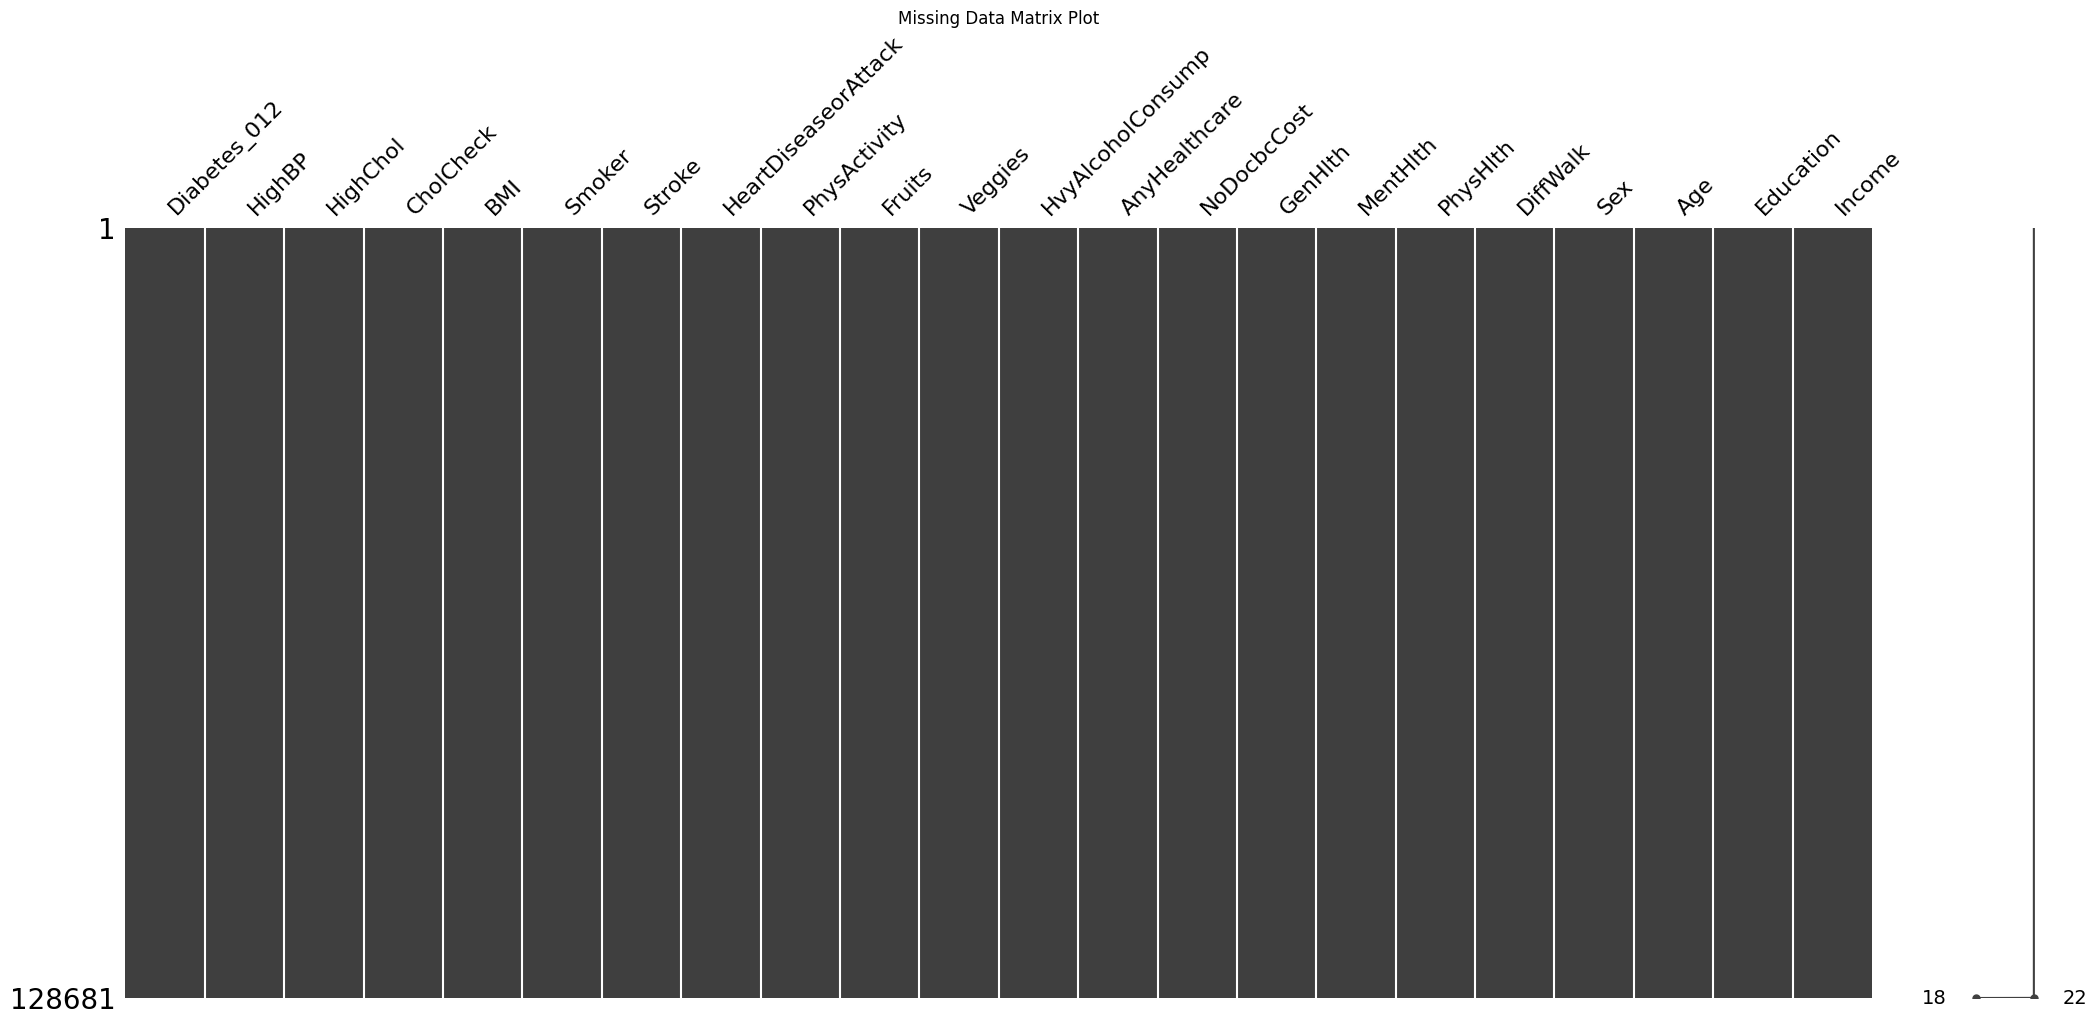

In [6]:
msno.matrix(df)
plt.title('Missing Data Matrix Plot')
plt.show()

In [7]:
df.duplicated().sum()

np.int64(9009)

In [8]:
duplicates = df[df.duplicated(keep=False)]
duplicates

Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
5                0.0     1.0       1.0        1.0  25.0     1.0     0.0   
25               0.0     0.0       0.0        1.0  32.0     0.0     0.0   
29               0.0     0.0       1.0        1.0  31.0     1.0     0.0   
44               0.0     0.0       1.0        1.0  31.0     1.0     0.0   
52               2.0     1.0       1.0        1.0  27.0     1.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
128636           0.0     0.0       0.0        1.0  23.0     0.0     0.0   
128638           0.0     1.0       1.0        1.0  26.0     1.0     0.0   
128643           0.0     0.0       0.0        1.0  22.0     0.0     0.0   
128676           0.0     0.0       0.0        1.0  25.0     1.0     0.0   
128678           0.0     0.0       0.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
5                        0.0           1.0     1.0  ...            1.0   
25                       0.0           1.0     1.0  ...            1.0   
29                       0.0           1.0     1.0  ...            1.0   
44                       0.0           0.0     1.0  ...            1.0   
52                       0.0           0.0     0.0  ...            1.0   
...                      ...           ...     ...  ...            ...   
128636                   0.0           1.0     1.0  ...            1.0   
128638                   1.0           1.0     1.0  ...            1.0   
128643                   0.0           1.0     0.0  ...            1.0   
128676                   0.0           1.0     1.0  ...            1.0   
128678                   0.0           1.0     1.0  ...            1.0   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  \
5               0.0      2.0       0.0       2.0       0.0  1.0  10.0   
25              0.0      2.0       0.0       0.0       0.0  0.0   5.0   
29              0.0      1.0       0.0       0.0       0.0  1.0  12.0   
44              0.0      2.0       0.0       0.0       0.0  0.0   8.0   
52              0.0      5.0       0.0      30.0       1.0  0.0  10.0   
...             ...      ...       ...       ...       ...  ...   ...   
128636          0.0      1.0       0.0       0.0       0.0  0.0   7.0   
128638          0.0      2.0       0.0       0.0       0.0  1.0  11.0   
128643          0.0      1.0       0.0       0.0       0.0  0.0   5.0   
128676          0.0      1.0       0.0       0.0       0.0  1.0  13.0   
128678          0.0      1.0       0.0       0.0       0.0  0.0   8.0   

        Education  Income  
5             6.0     8.0  
25            6.0     8.0  
29            6.0     8.0  
44            5.0     8.0  
52            4.0     5.0  
...           ...     ...  
128636        6.0     8.0  
128638        6.0     7.0  
128643        6.0     8.0  
128676        6.0     8.0  
128678        5.0     8.0  

[13682 rows x 22 columns]

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.dtypes

Diabetes_012            float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [12]:
df['Diabetes_012'].value_counts()

Diabetes_012
0.0    99445
2.0    17822
1.0     2405
Name: count, dtype: int64

In [13]:
x=df.drop('Diabetes_012',axis=1)
y=df['Diabetes_012']

In [14]:
y[y == 2] = 1

y.value_counts()

Diabetes_012
0.0    99445
1.0    20227
Name: count, dtype: int64

In [15]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119672 entries, 0 to 128680
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                119672 non-null  float64
 1   HighChol              119672 non-null  float64
 2   CholCheck             119672 non-null  float64
 3   BMI                   119672 non-null  float64
 4   Smoker                119672 non-null  float64
 5   Stroke                119672 non-null  float64
 6   HeartDiseaseorAttack  119672 non-null  float64
 7   PhysActivity          119672 non-null  float64
 8   Fruits                119672 non-null  float64
 9   Veggies               119672 non-null  float64
 10  HvyAlcoholConsump     119672 non-null  float64
 11  AnyHealthcare         119672 non-null  float64
 12  NoDocbcCost           119672 non-null  float64
 13  GenHlth               119672 non-null  float64
 14  MentHlth              119672 non-null  float64
 15  PhysH

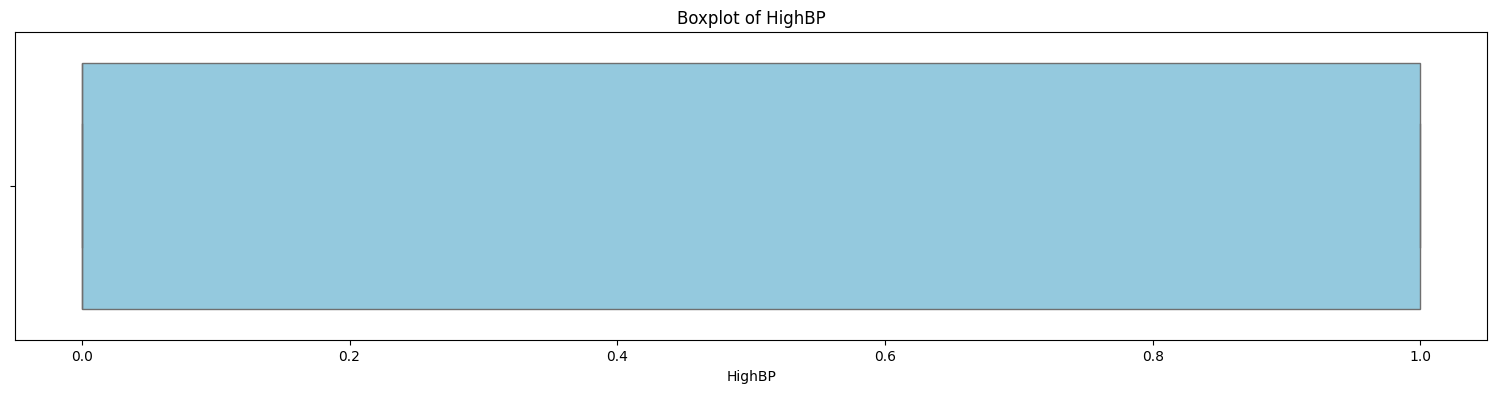

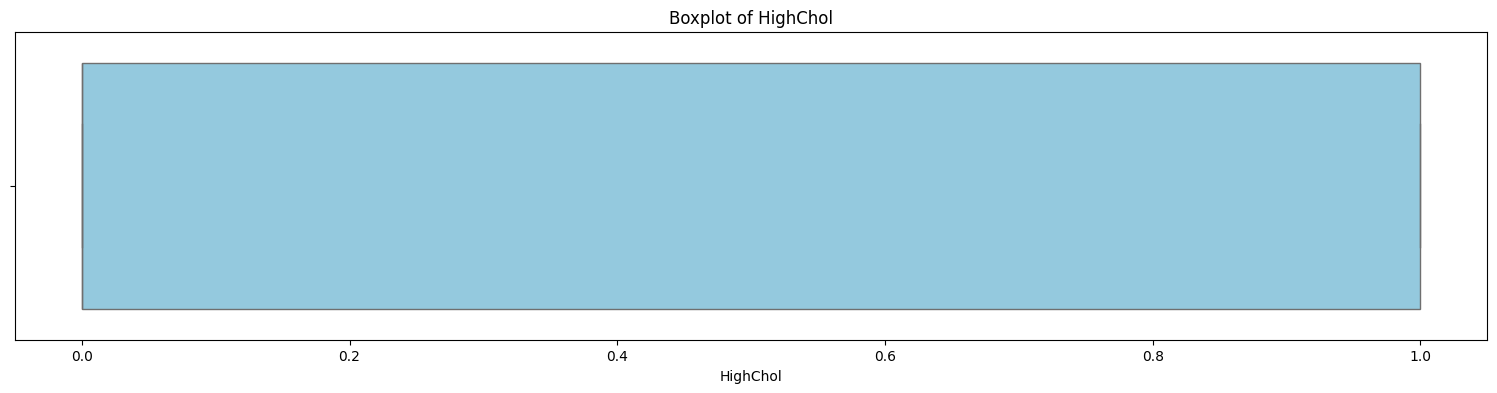

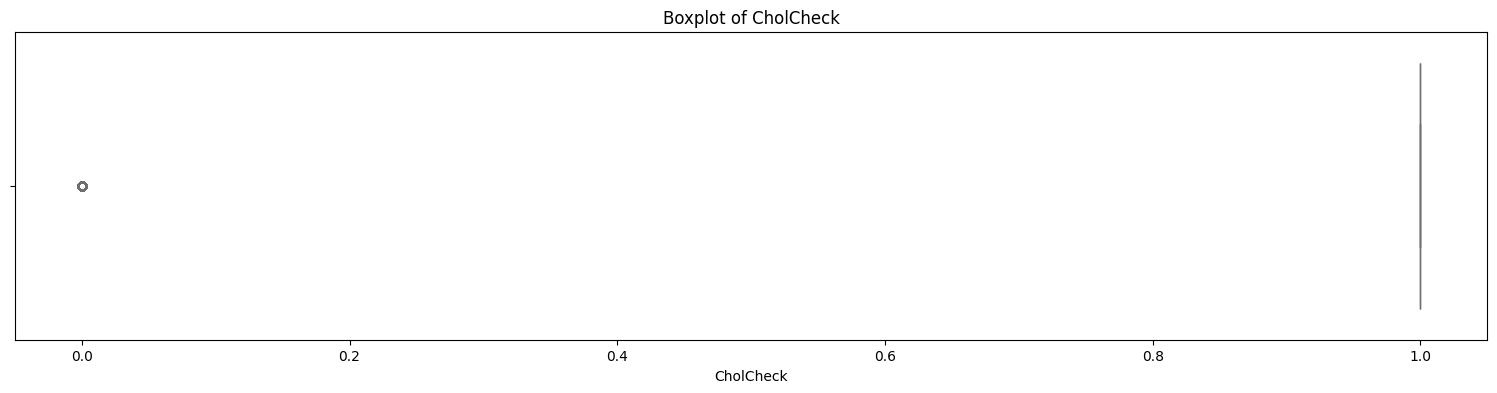

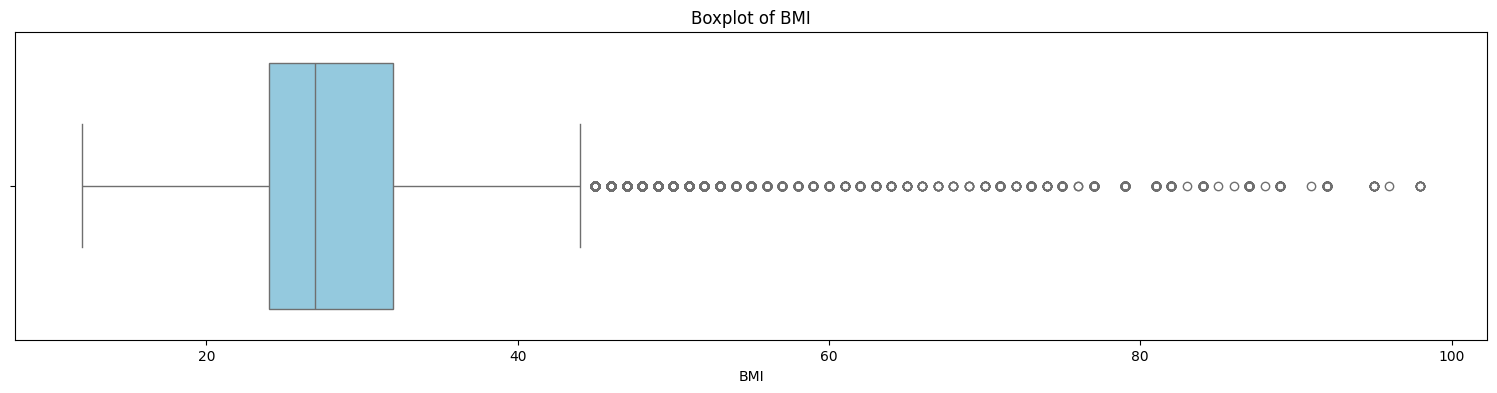

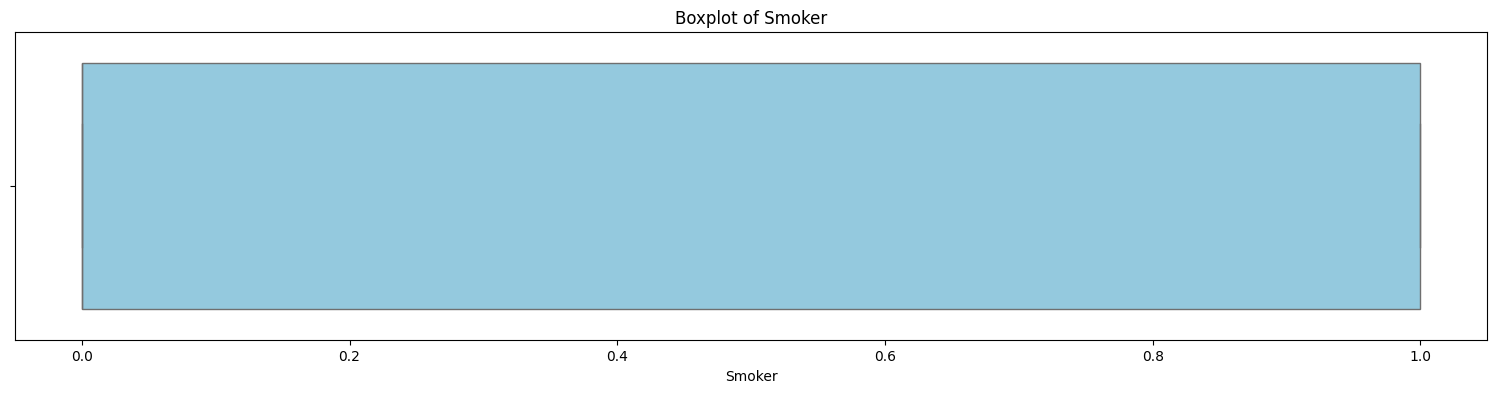

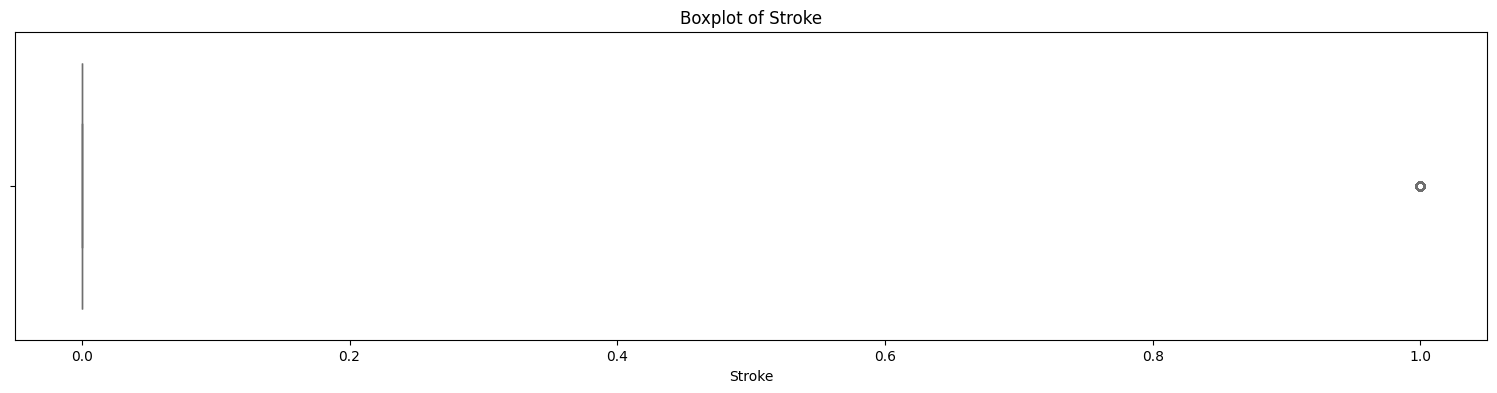

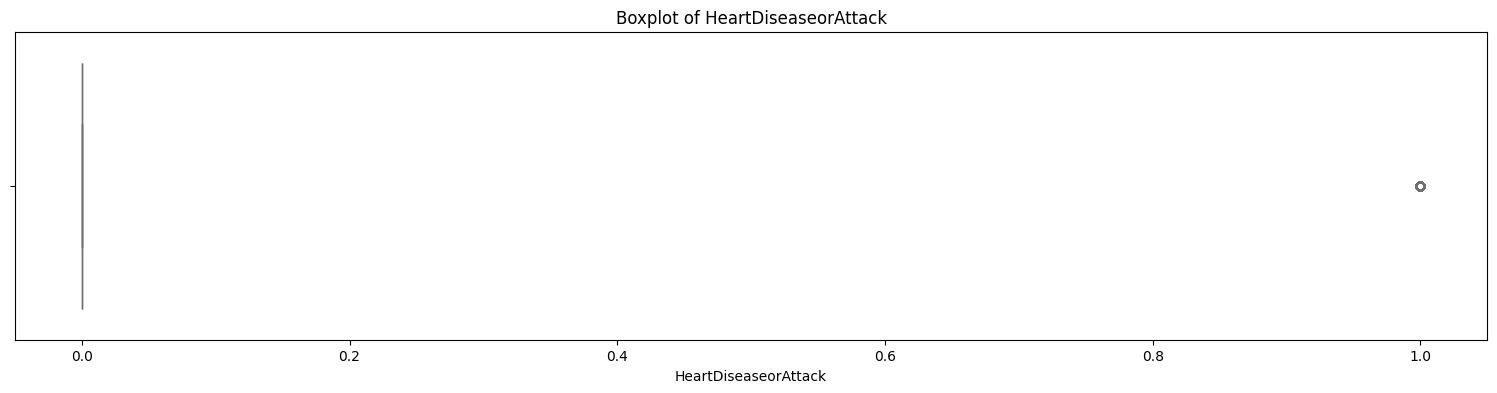

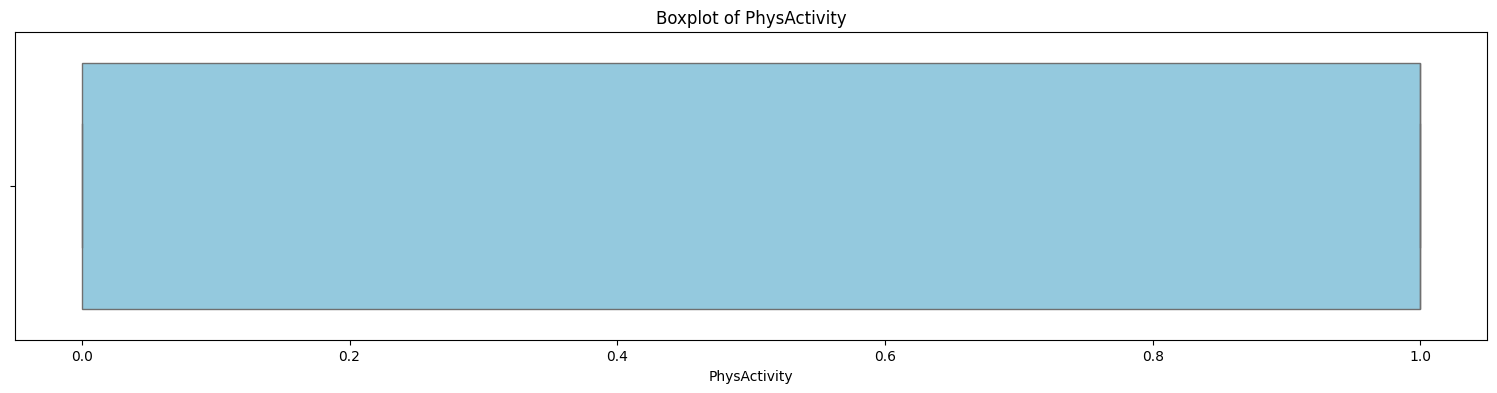

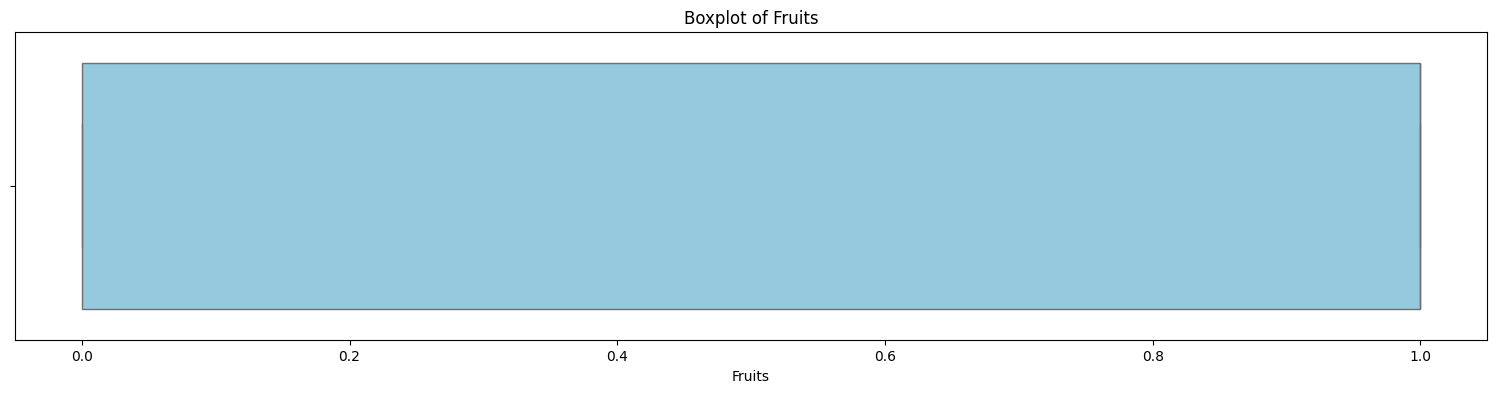

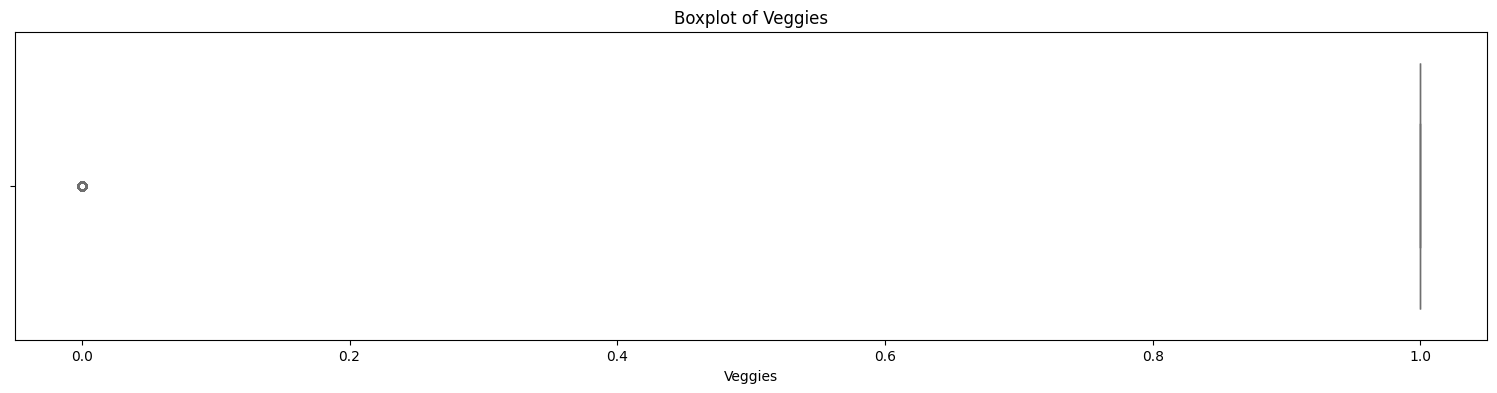

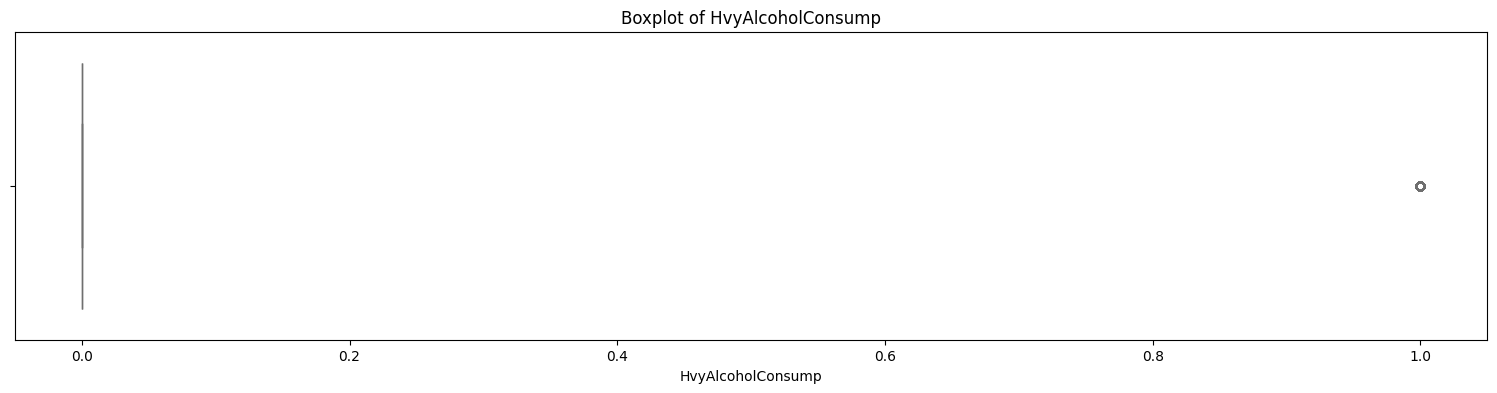

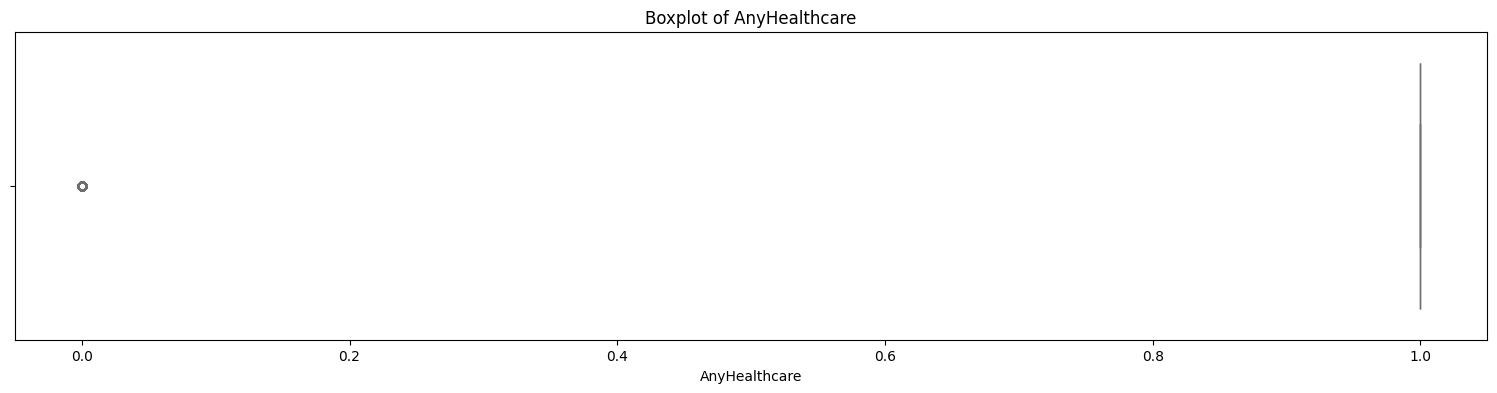

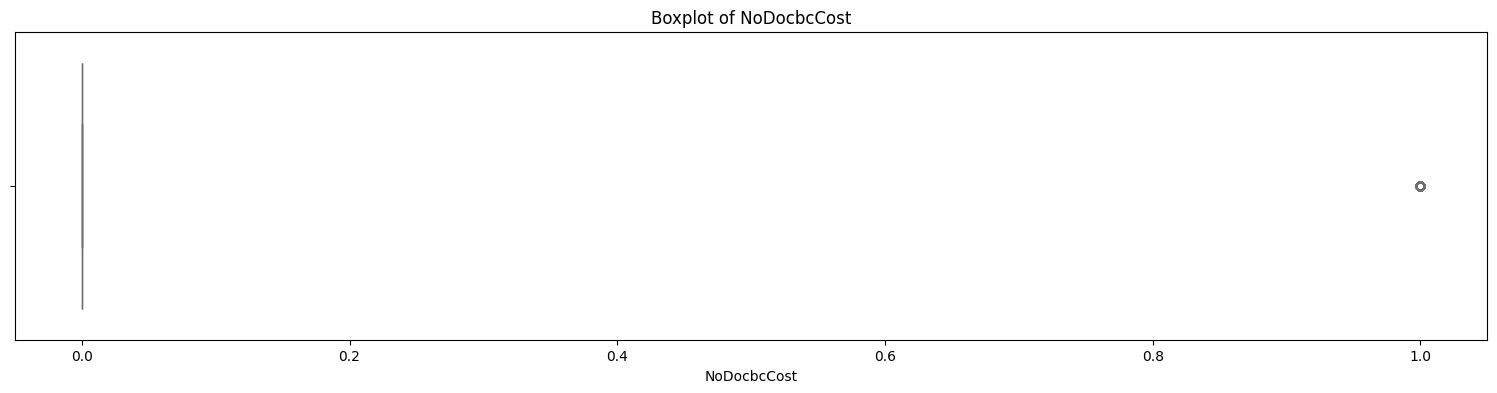

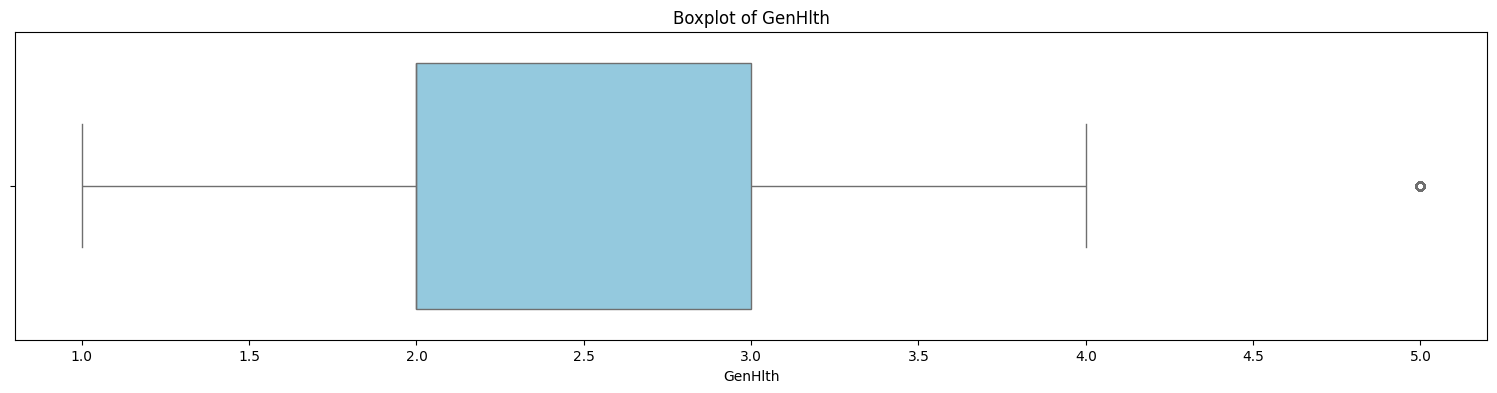

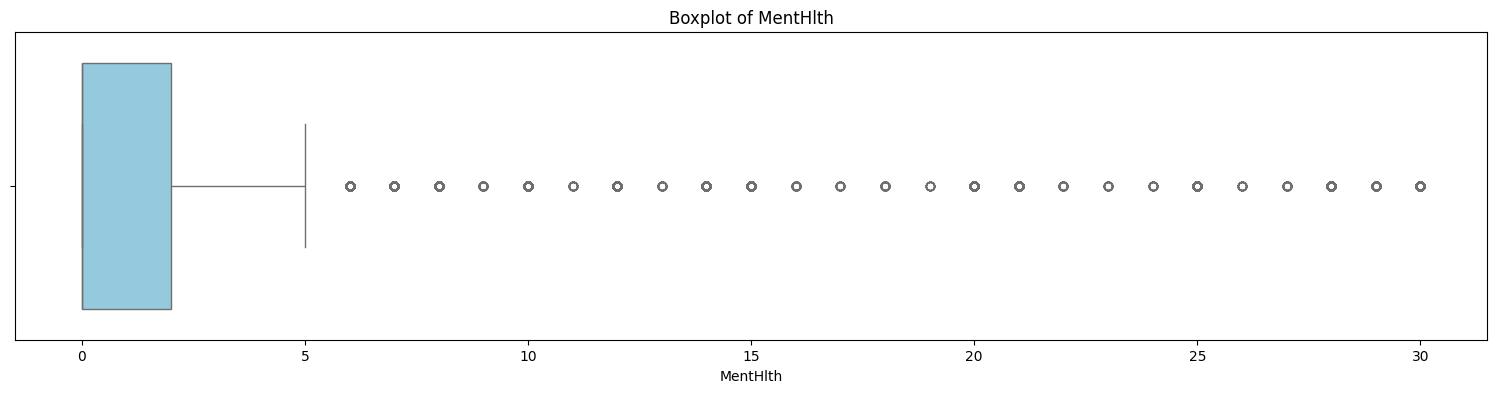

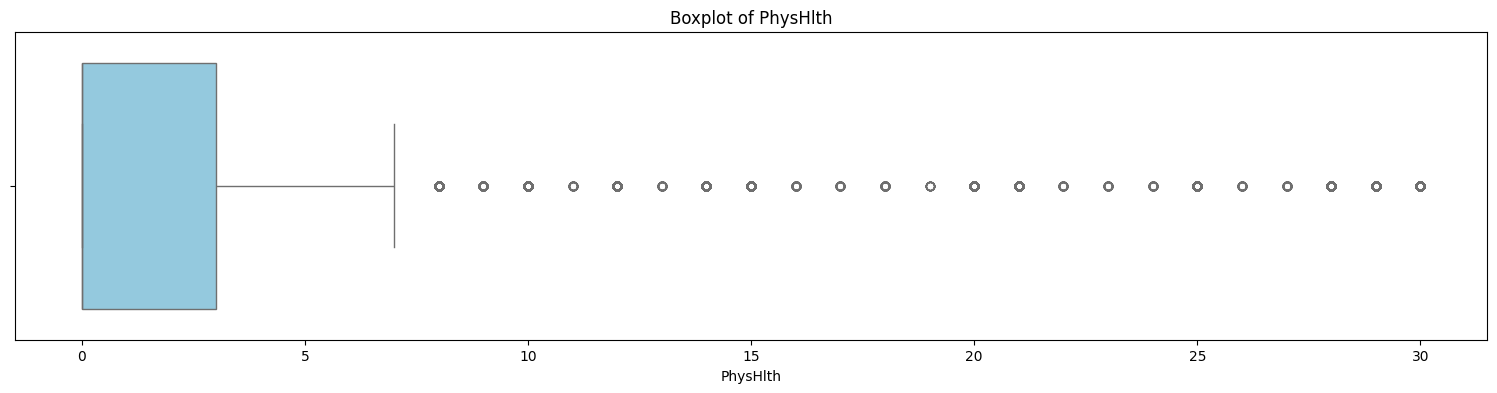

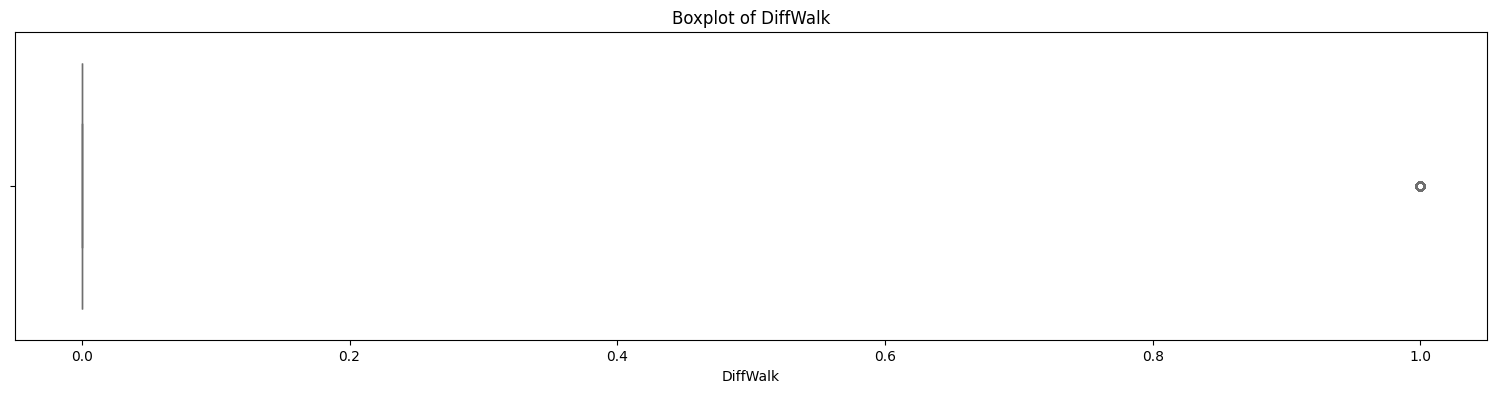

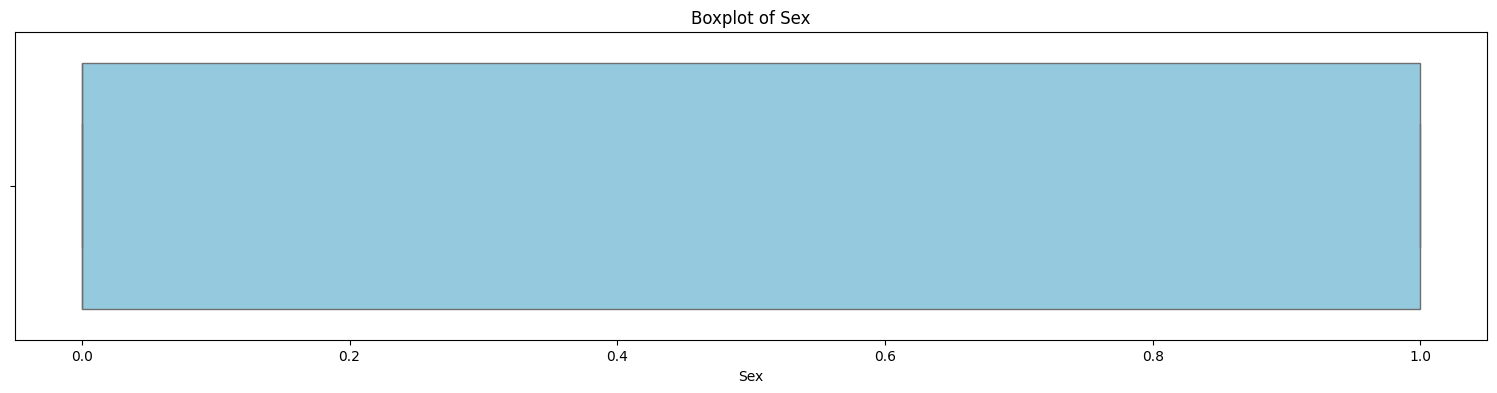

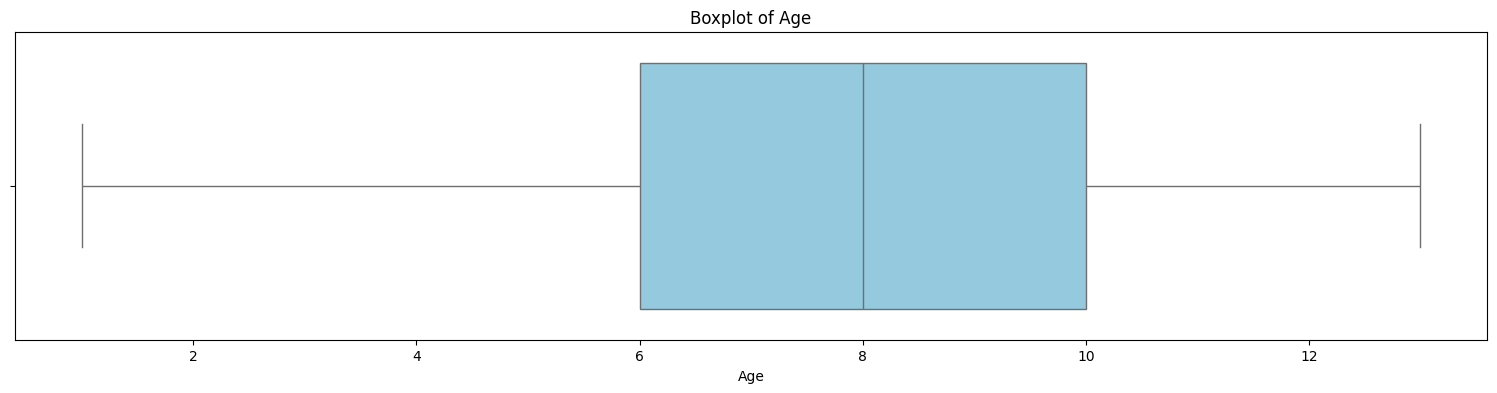

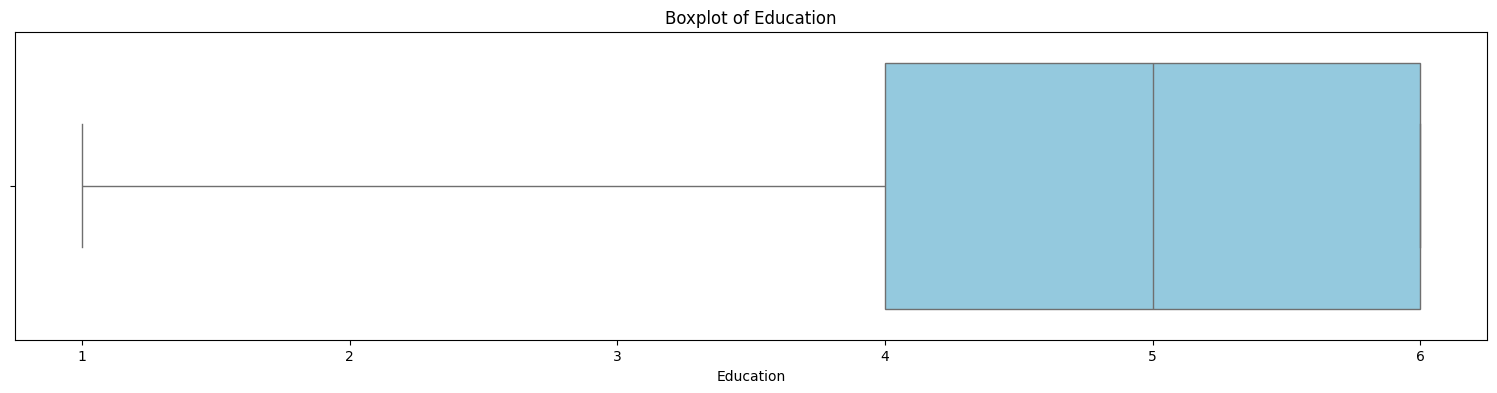

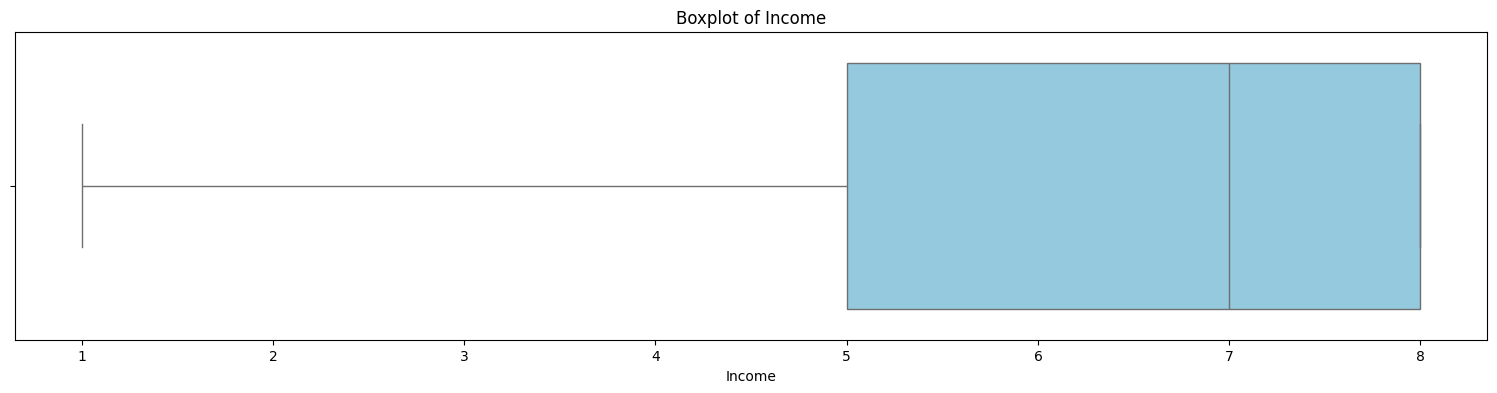

In [16]:
for feature in x.columns:
    plt.figure(figsize=(19, 4))
    sns.boxplot(x=x[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()


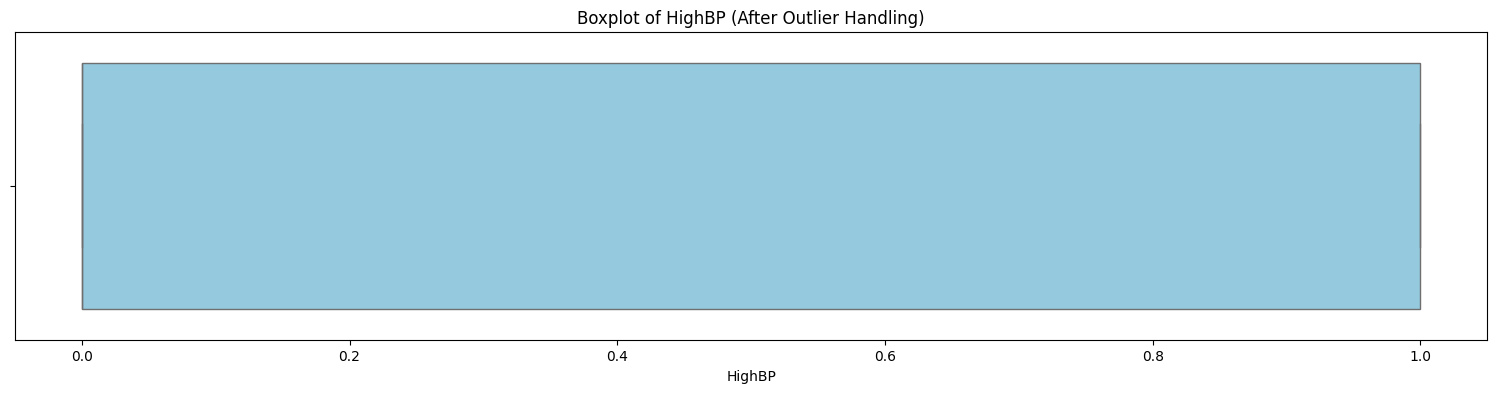

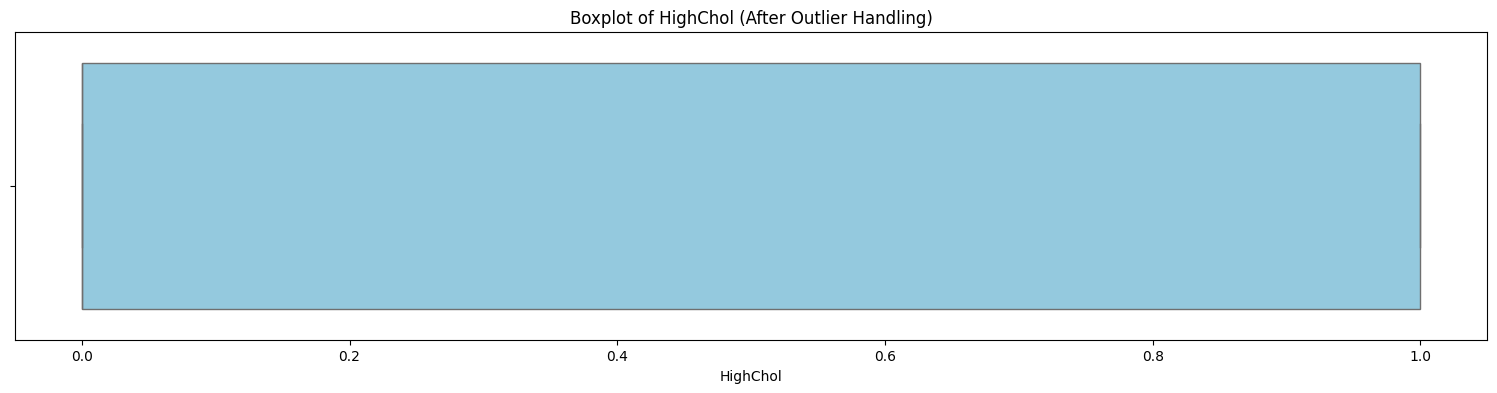

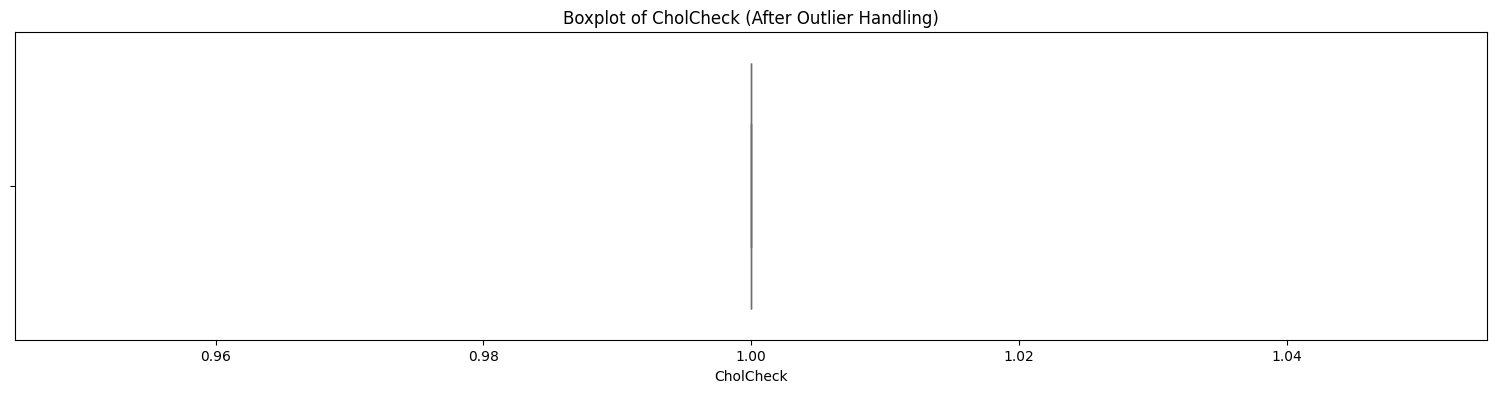

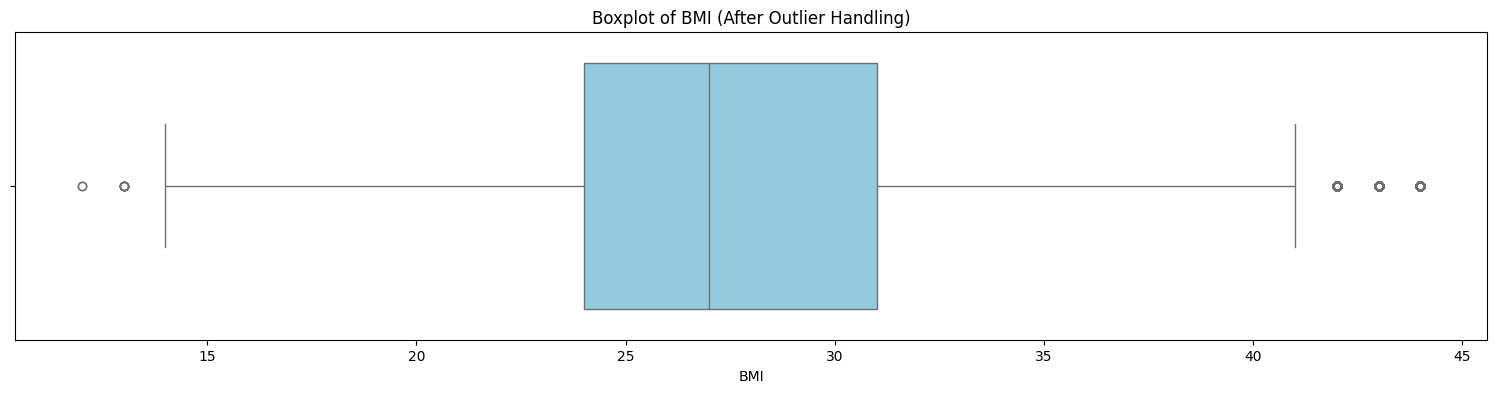

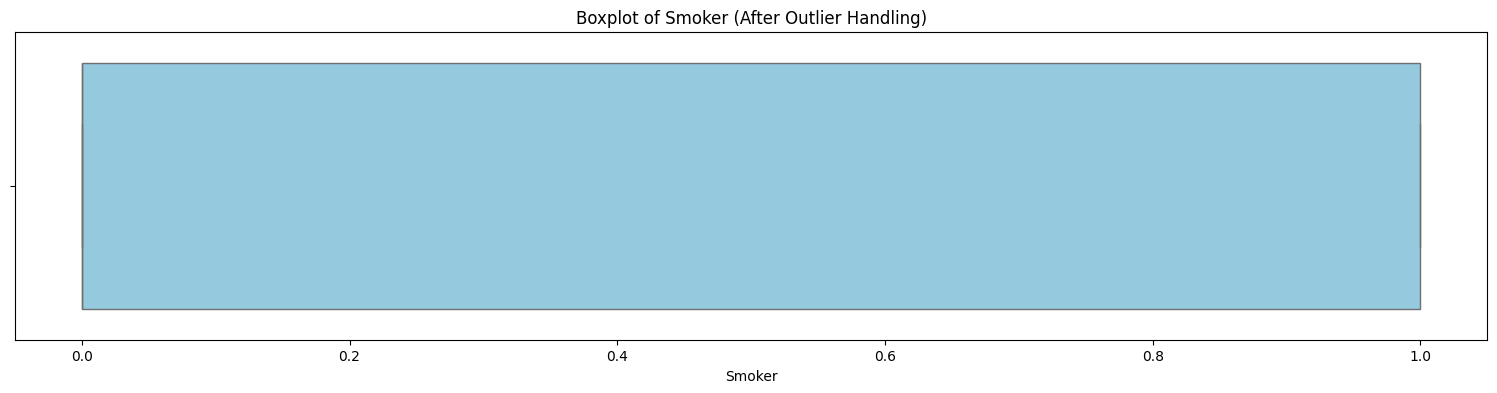

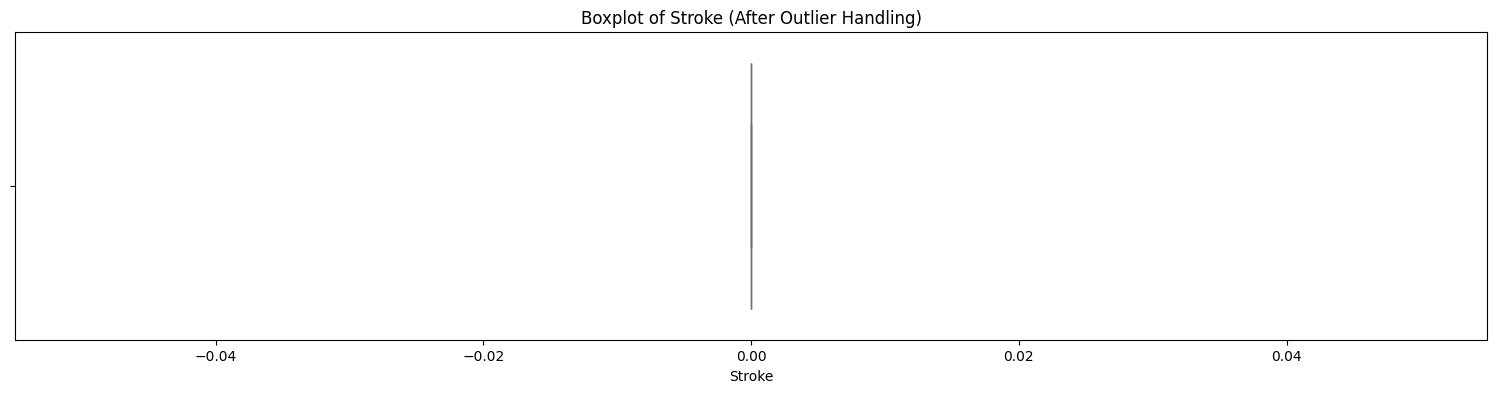

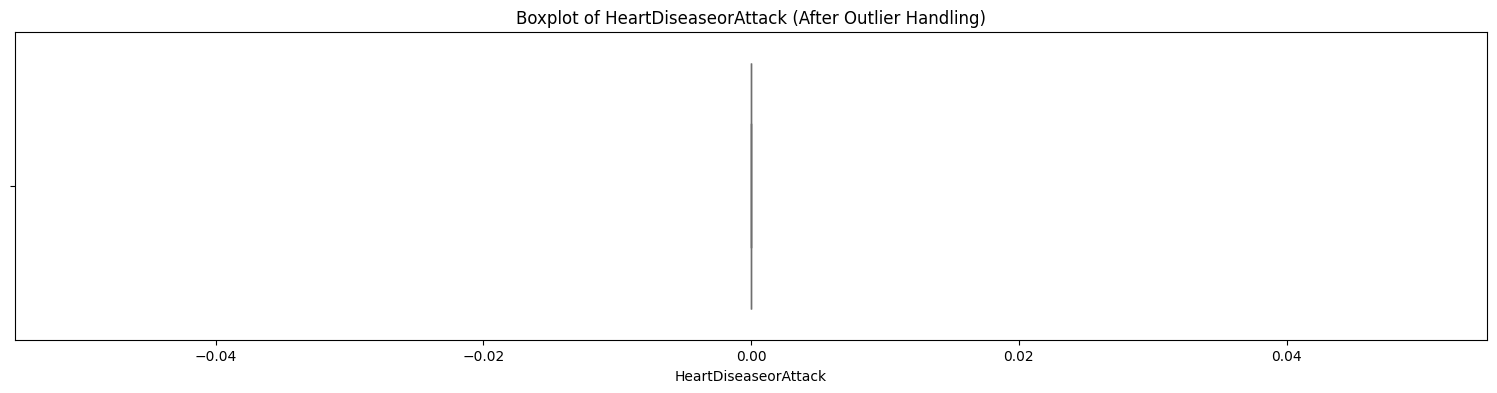

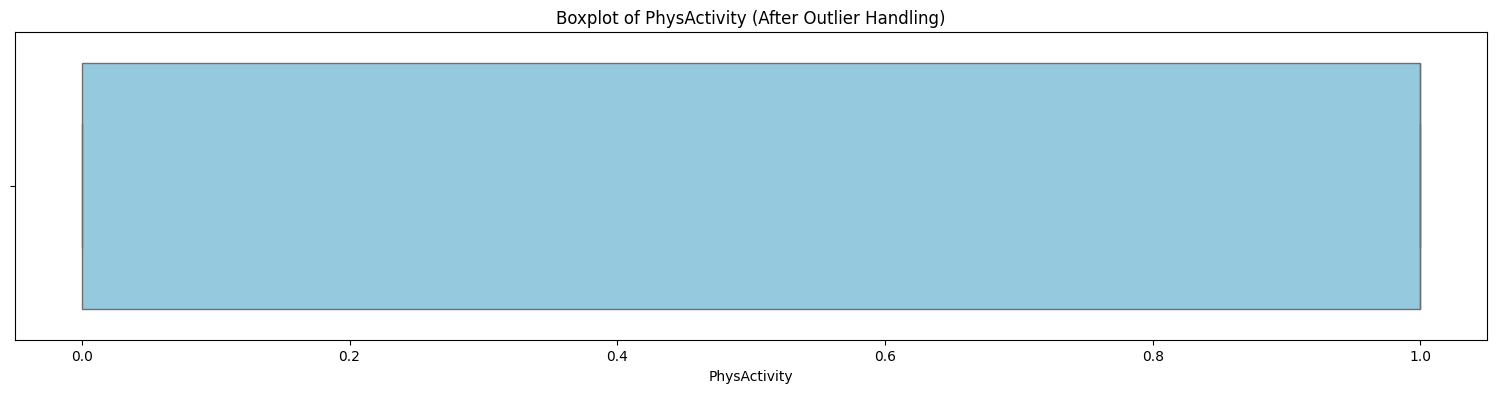

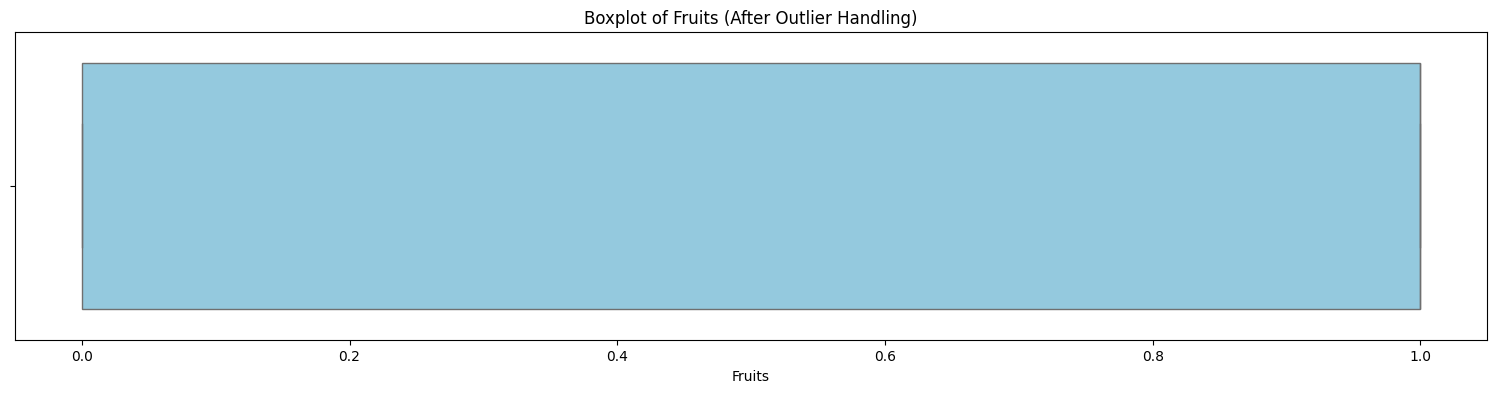

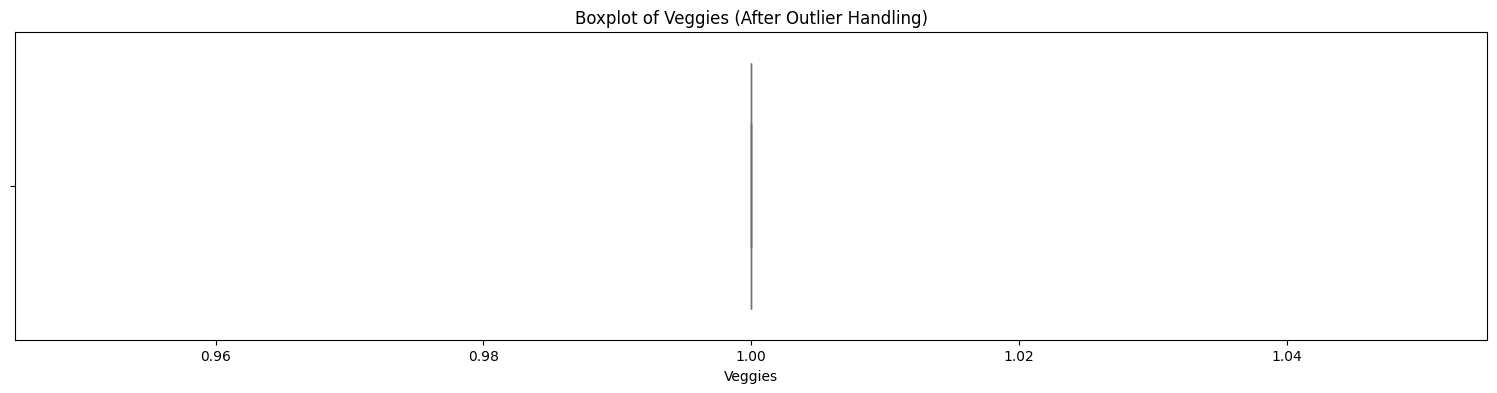

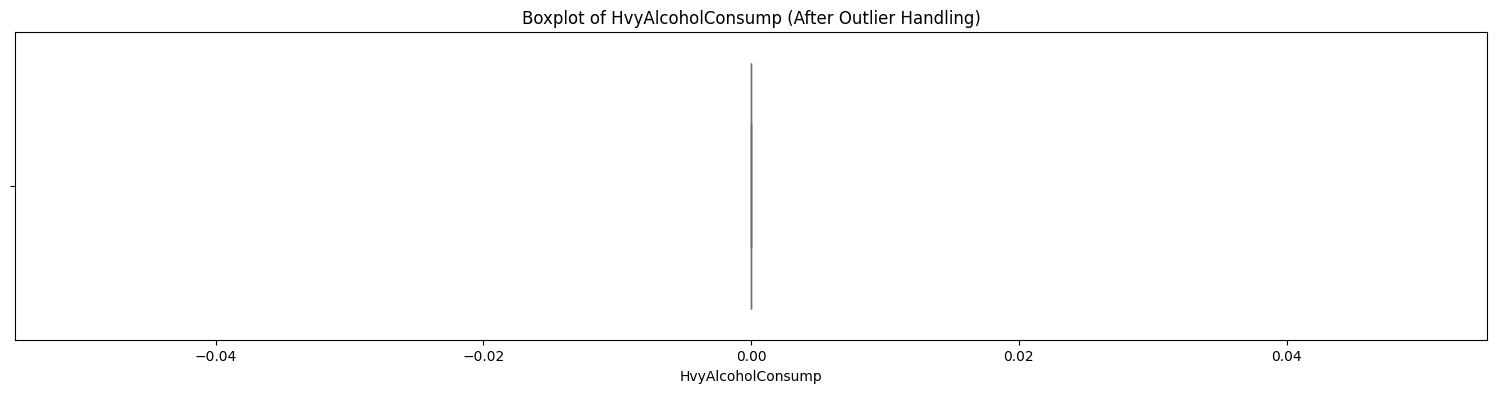

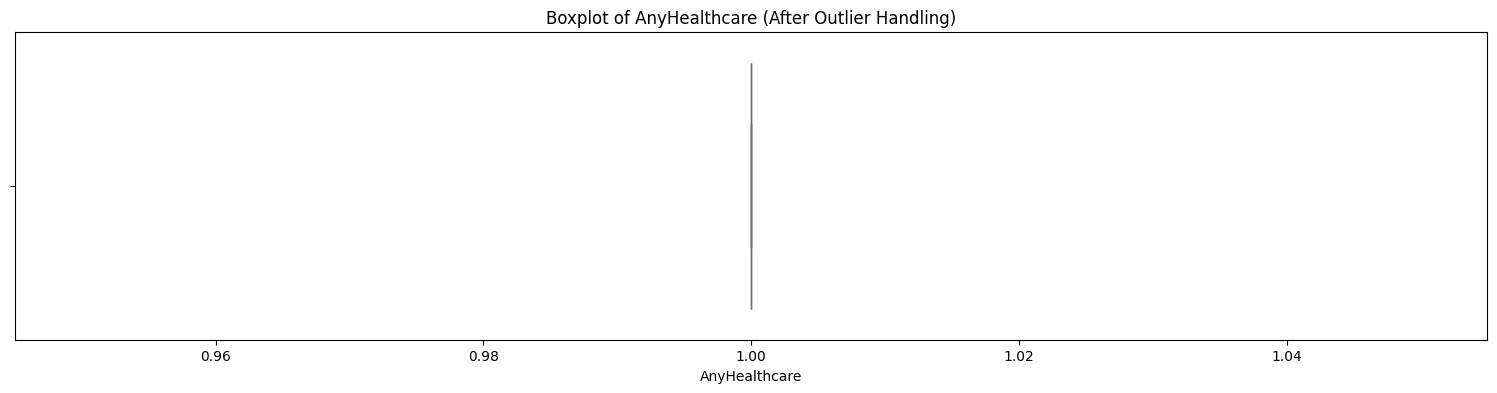

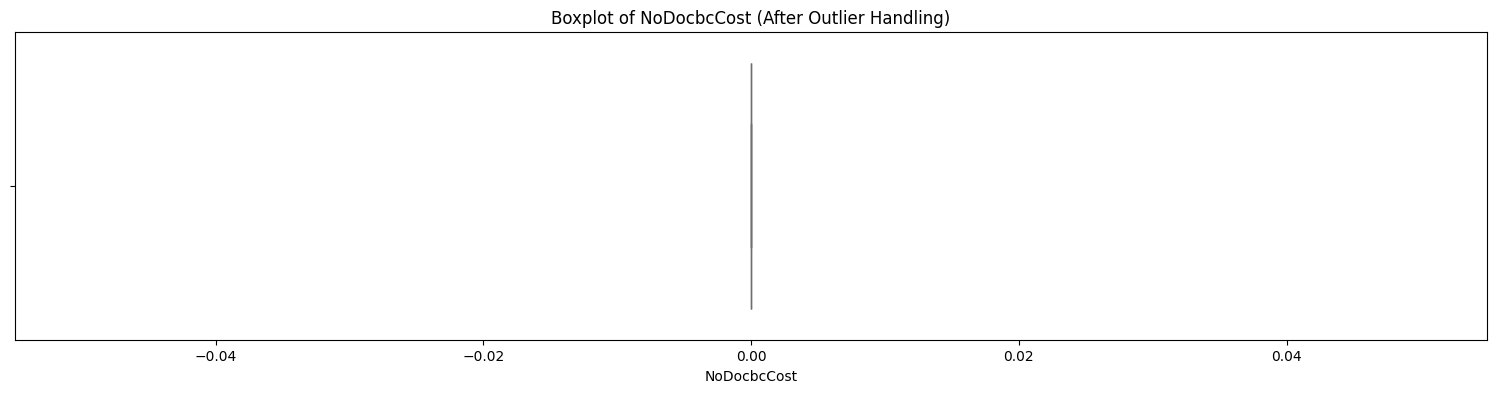

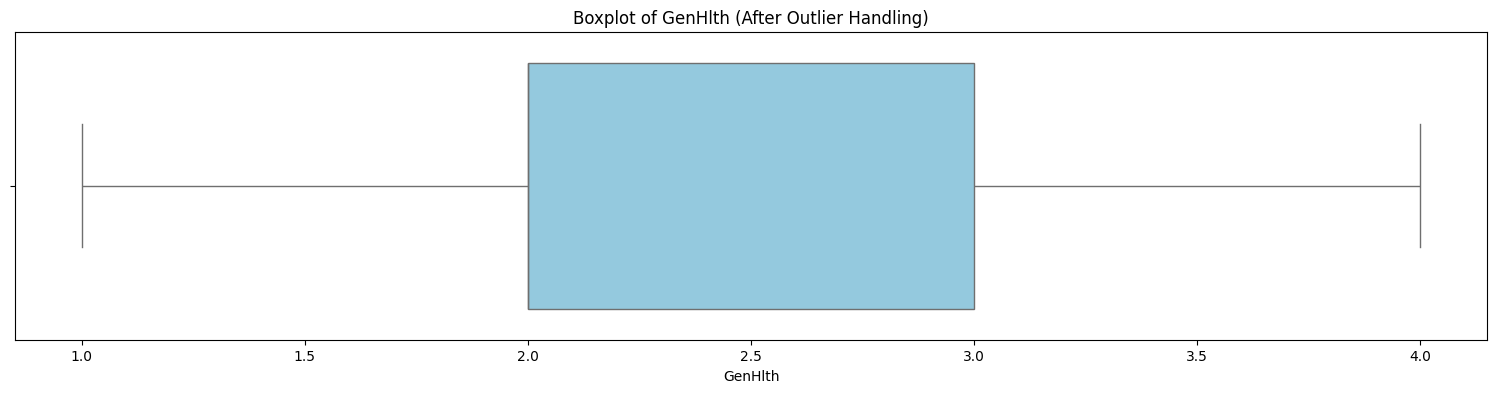

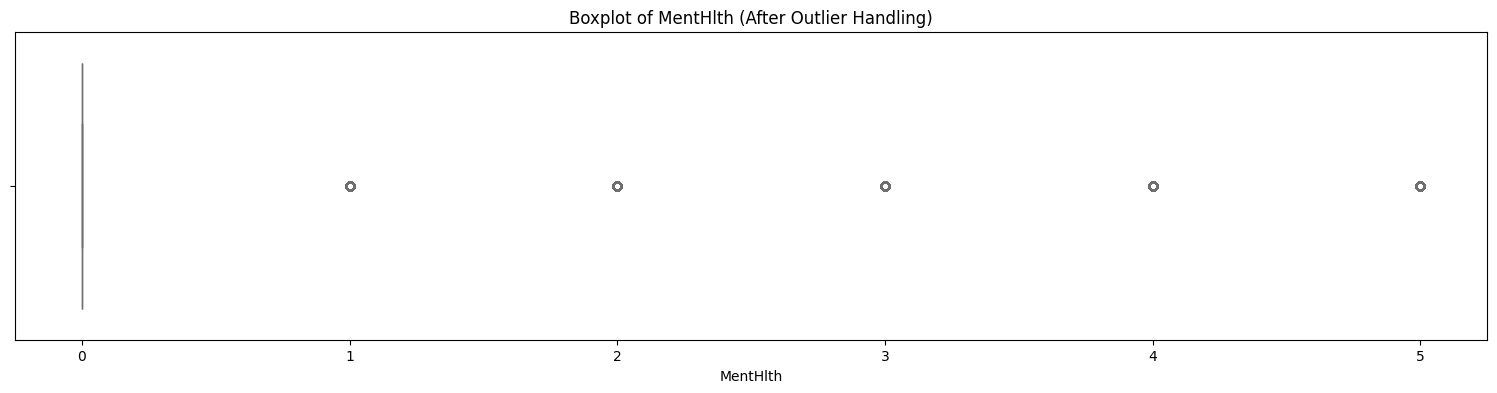

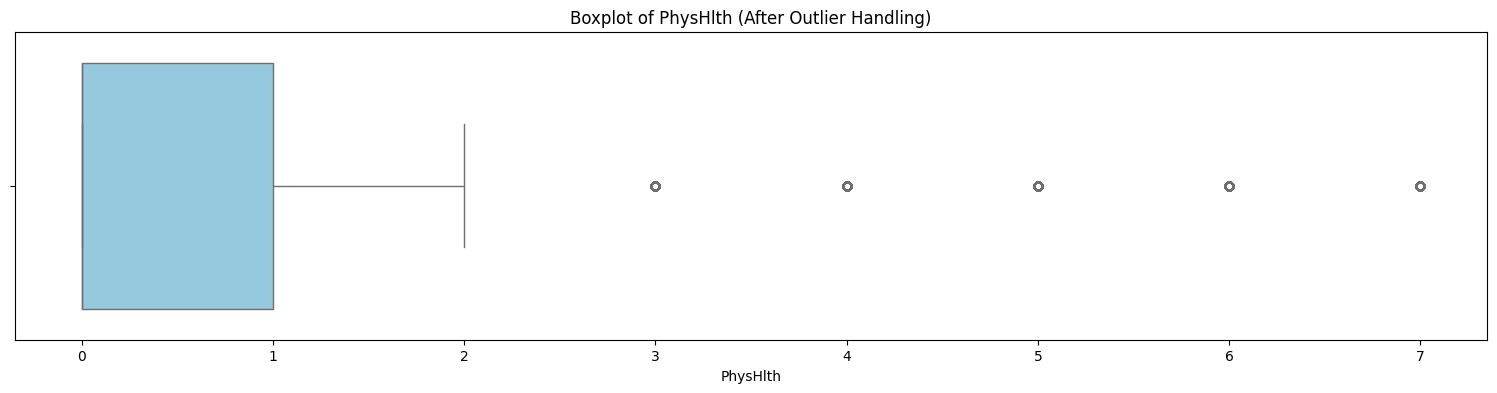

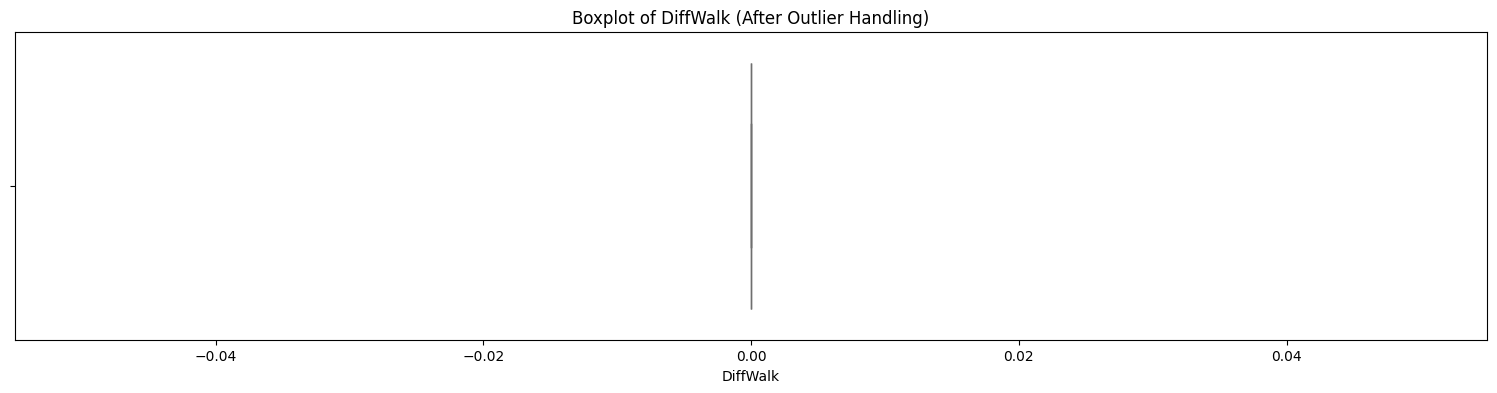

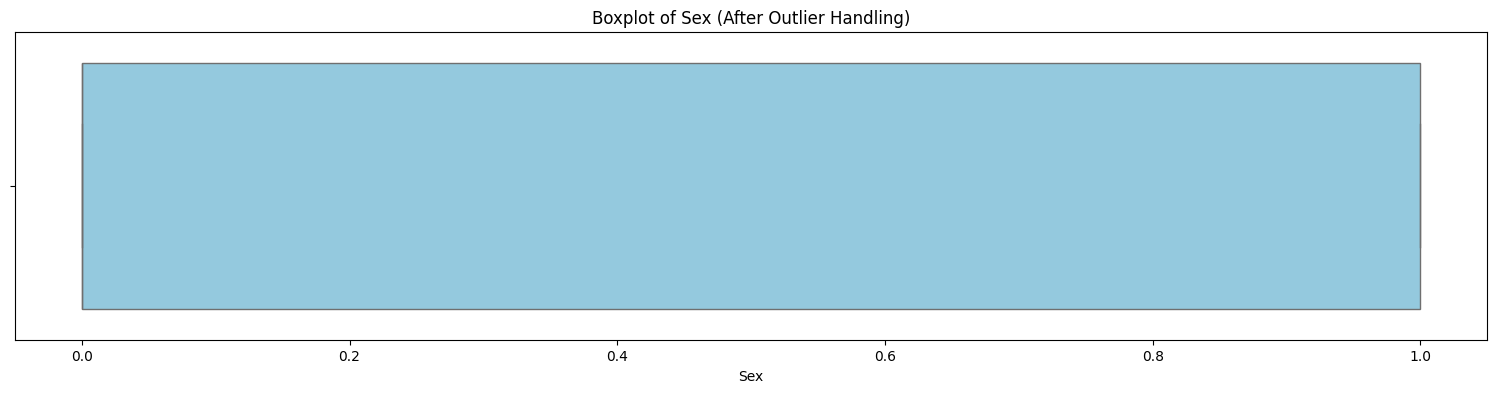

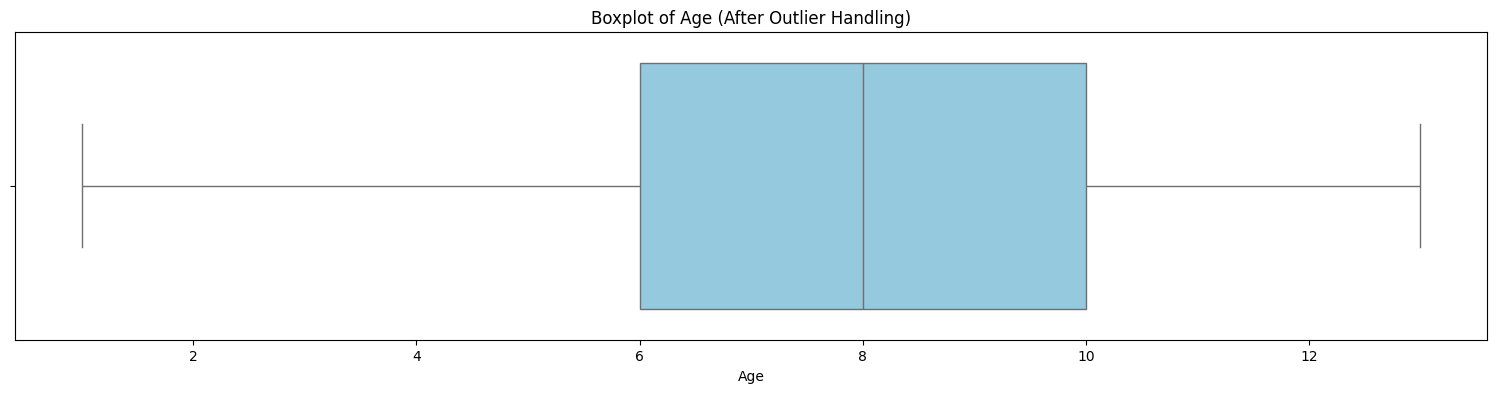

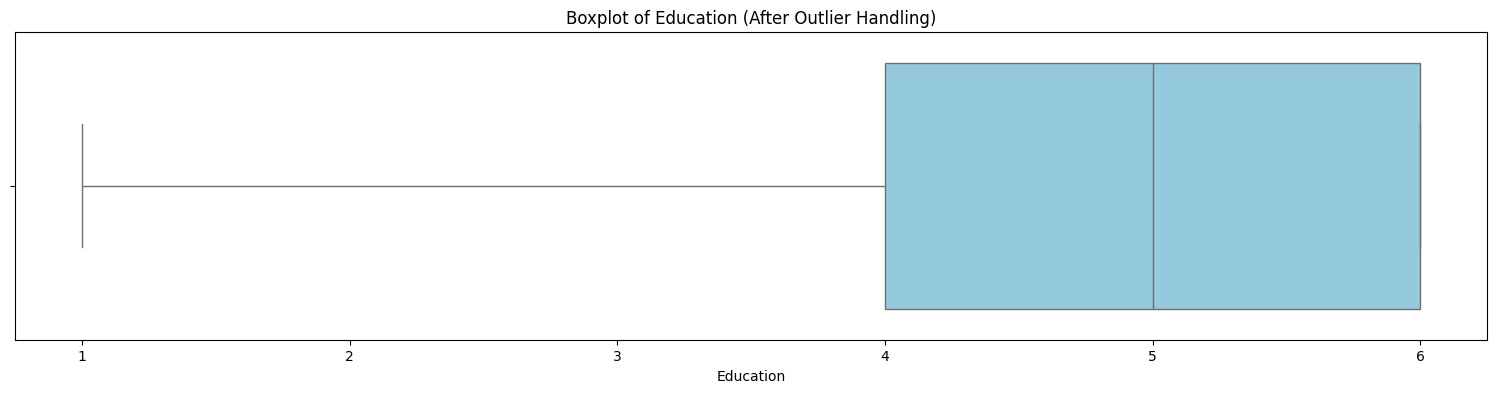

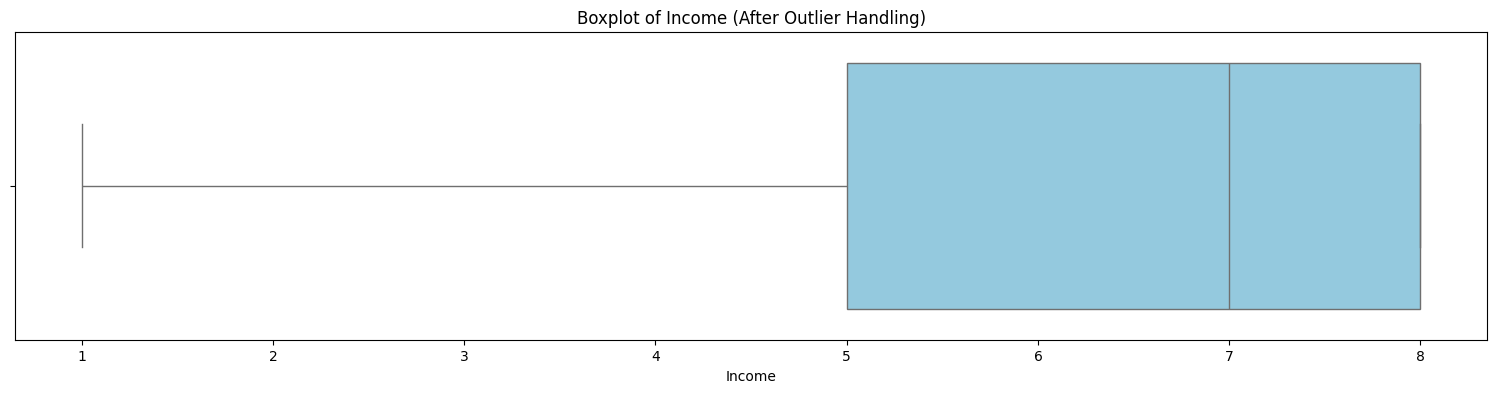

In [17]:
def handle_outliers(x, col, method='iqr', threshold=1.5):

    if method == 'iqr':
        Q1 = x[col].quantile(0.25)
        Q3 = x[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        x = x[(x[col] >= lower_bound) & (x[col] <= upper_bound)]
    elif method == 'zscore':
        from scipy import stats
        z = np.abs(stats.zscore(x[col]))
        x = x[(z < threshold)]
    else:
        raise ValueError("Invalid outlier handling method. Choose 'iqr' or 'zscore'.")

    return x[col]

for col in x.columns:
    x[col] = handle_outliers(x, col, method='iqr')
    plt.figure(figsize=(19, 4))
    sns.boxplot(x=x[col], color='skyblue')
    plt.title(f'Boxplot of {col} (After Outlier Handling)')
    plt.xlabel(col)
    plt.show()


#EDA

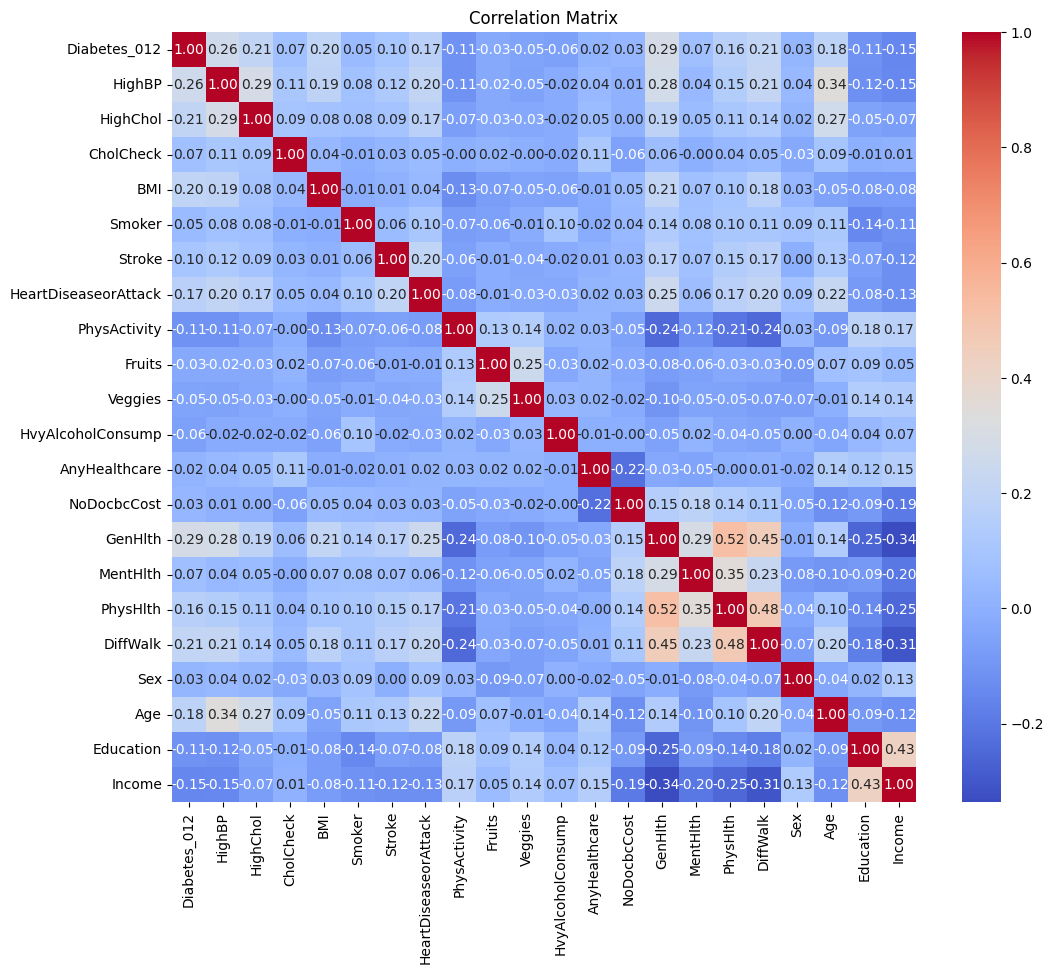

In [18]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

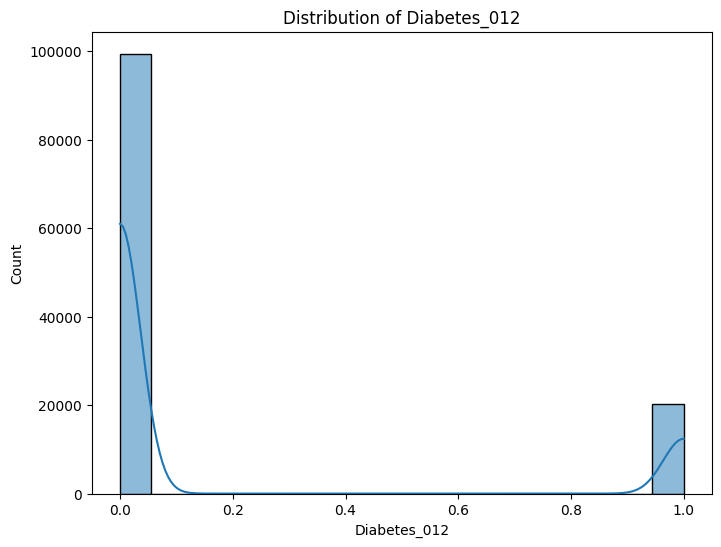

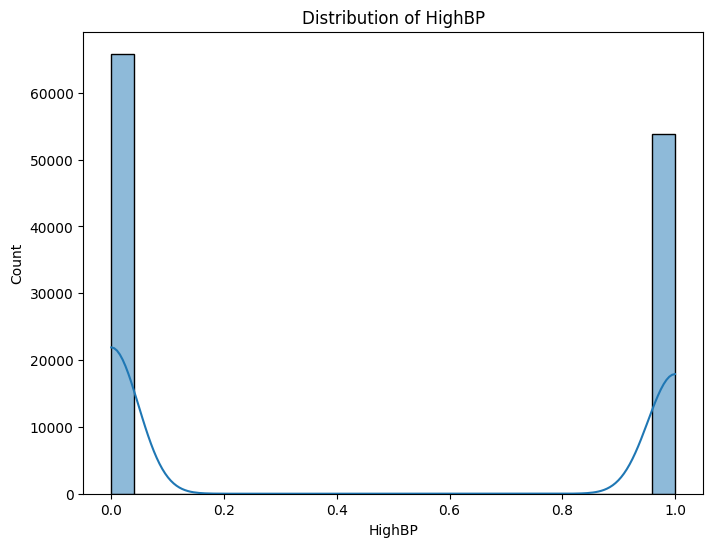

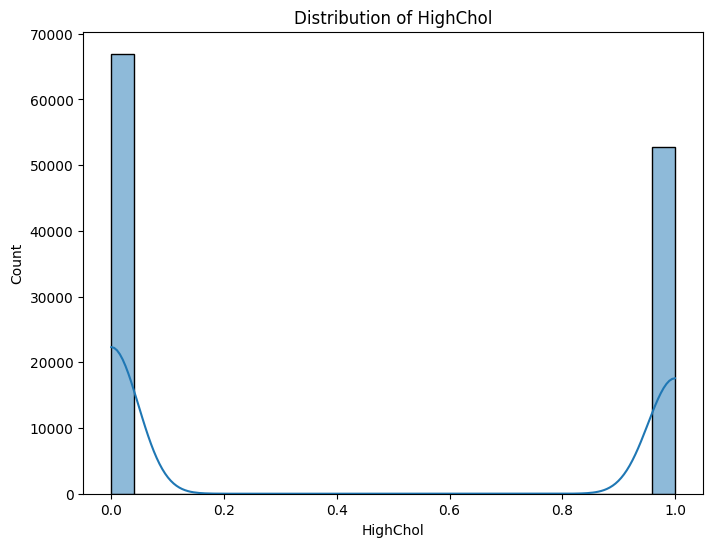

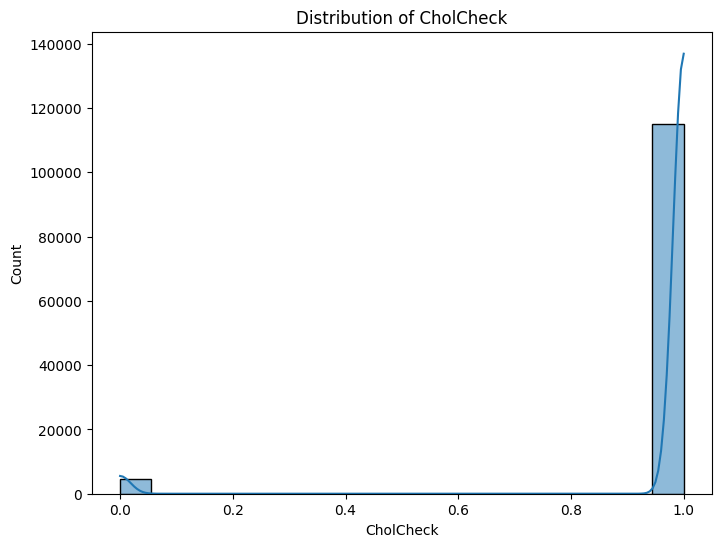

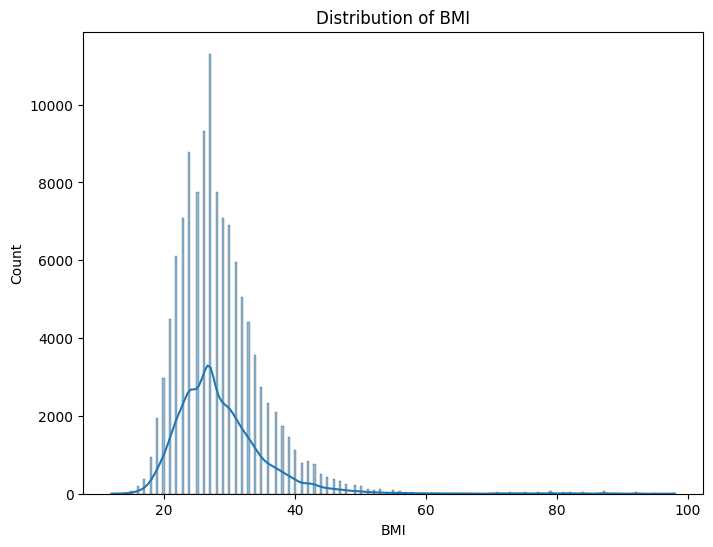

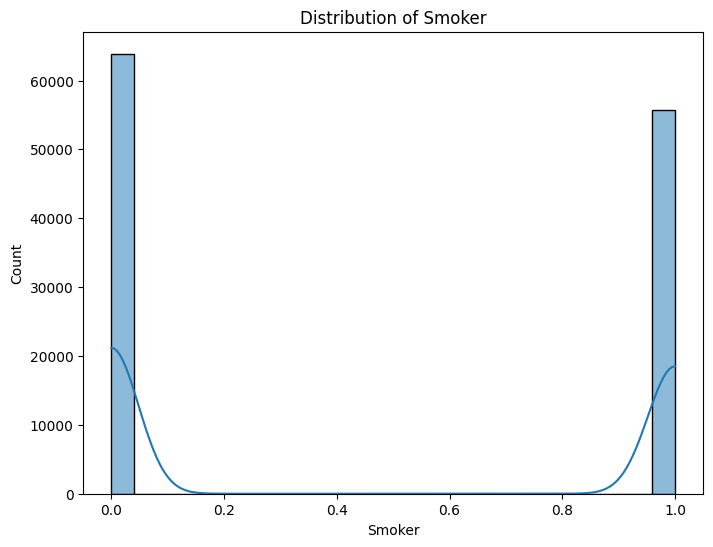

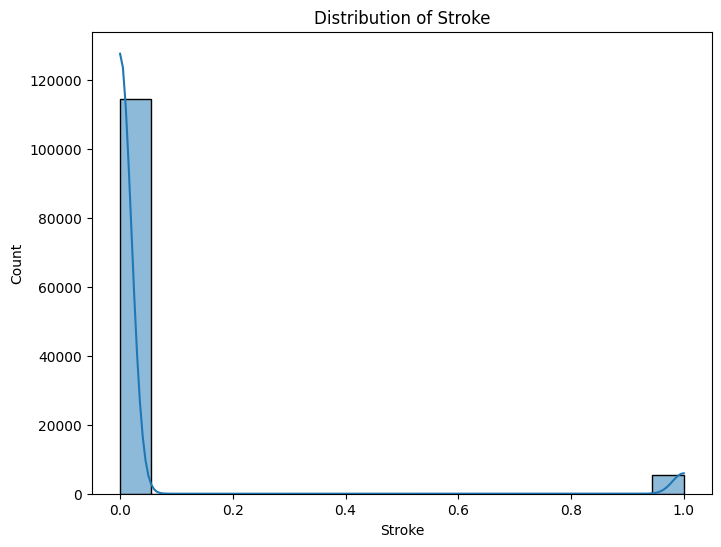

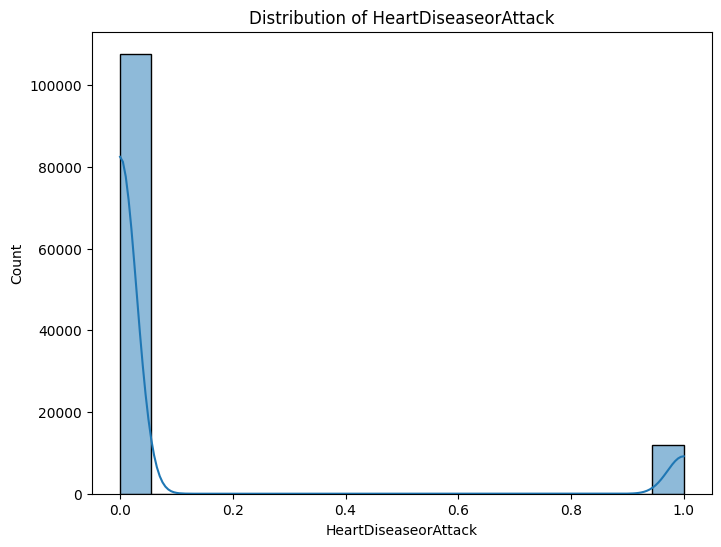

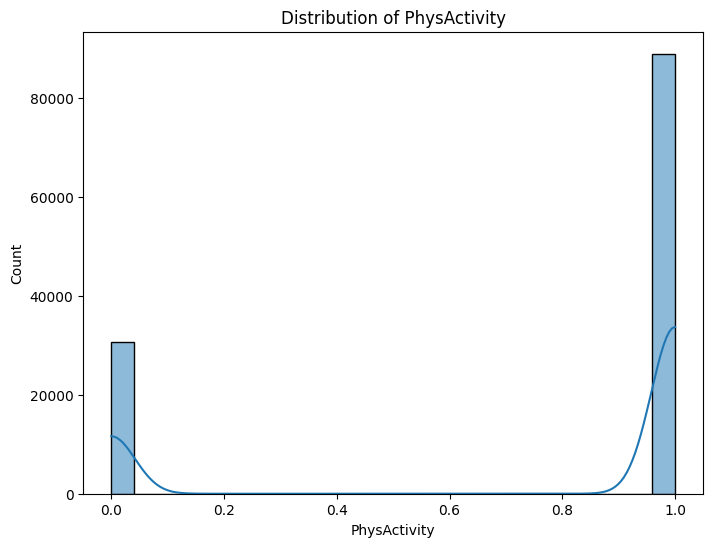

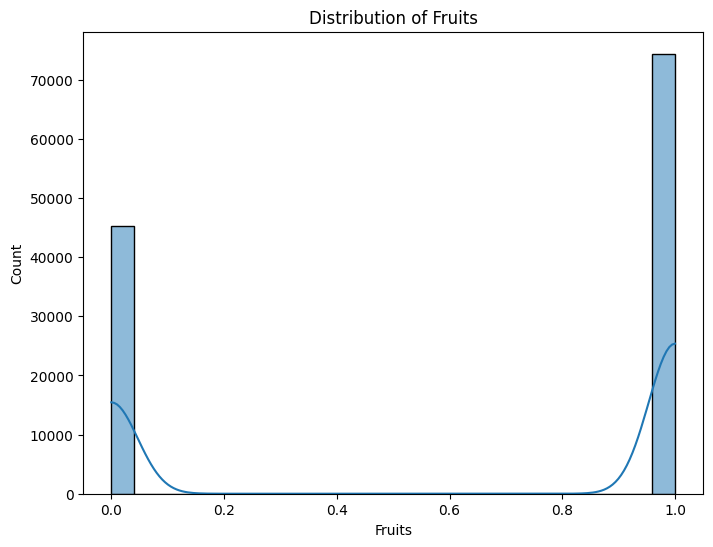

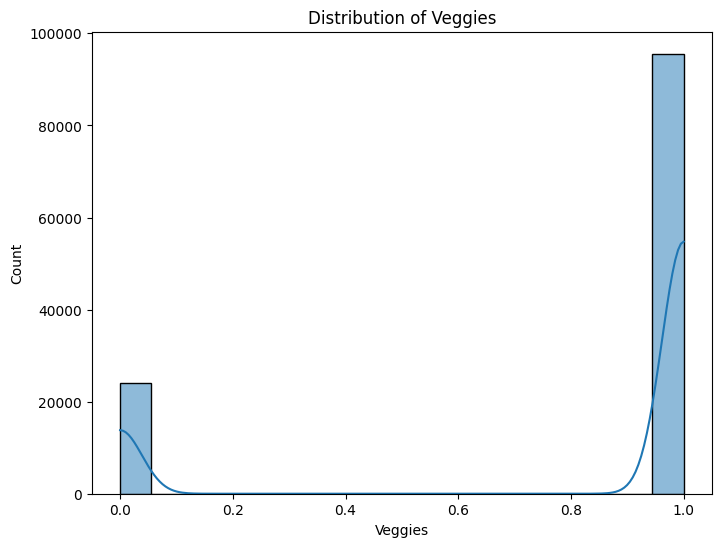

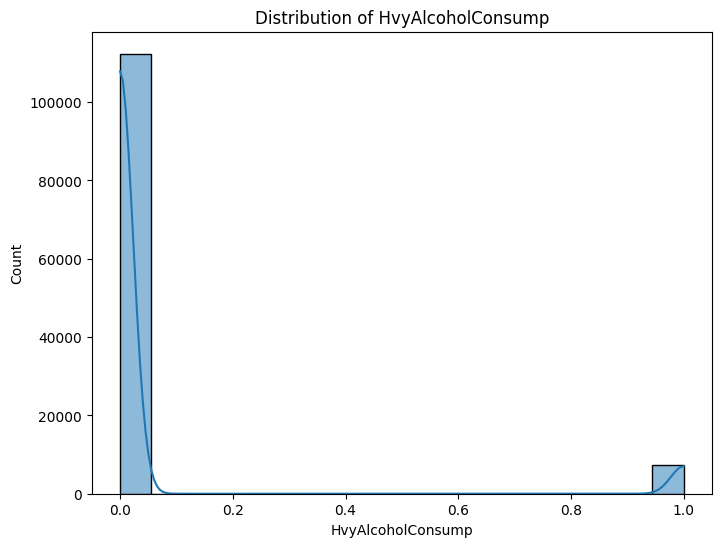

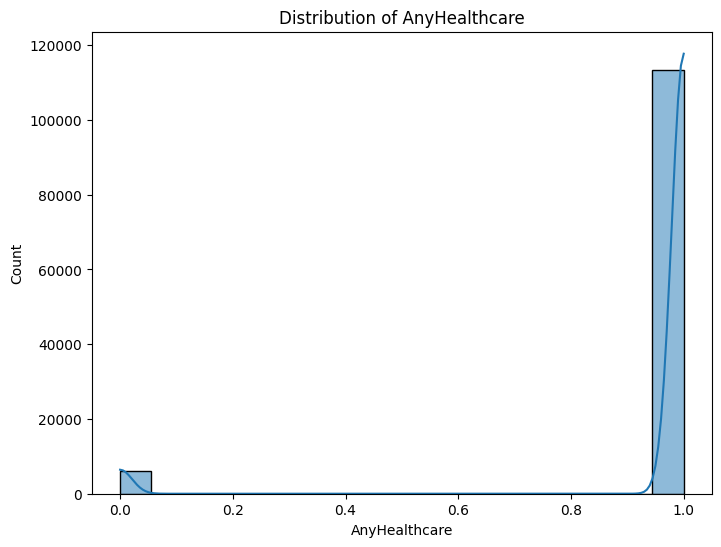

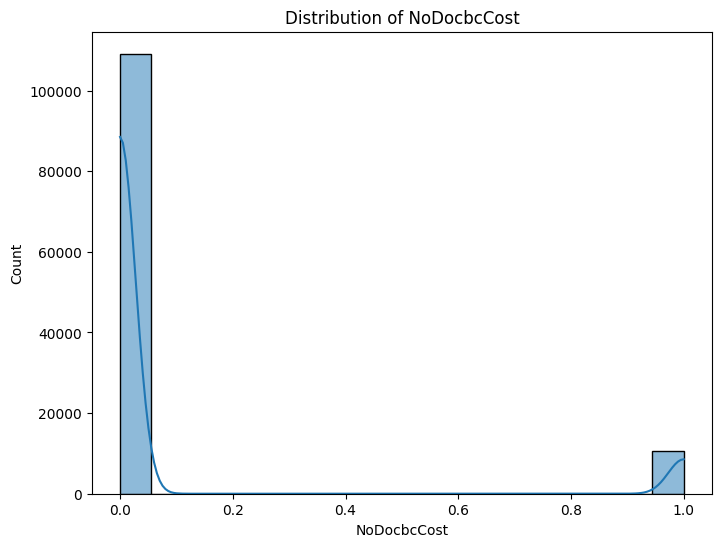

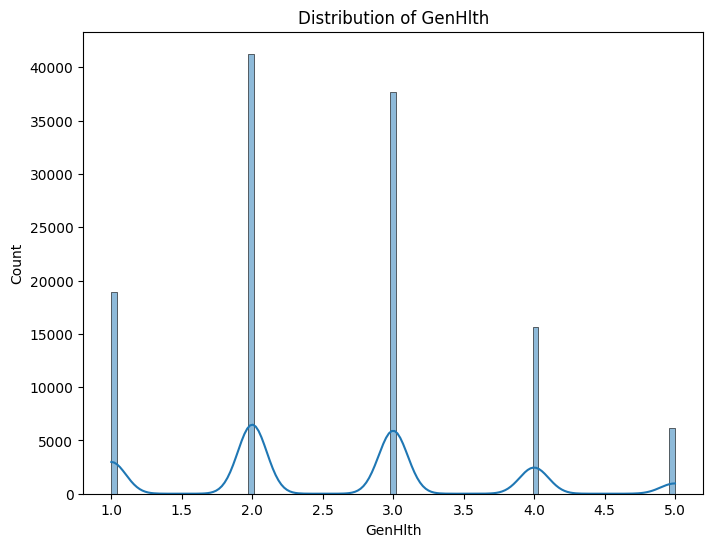

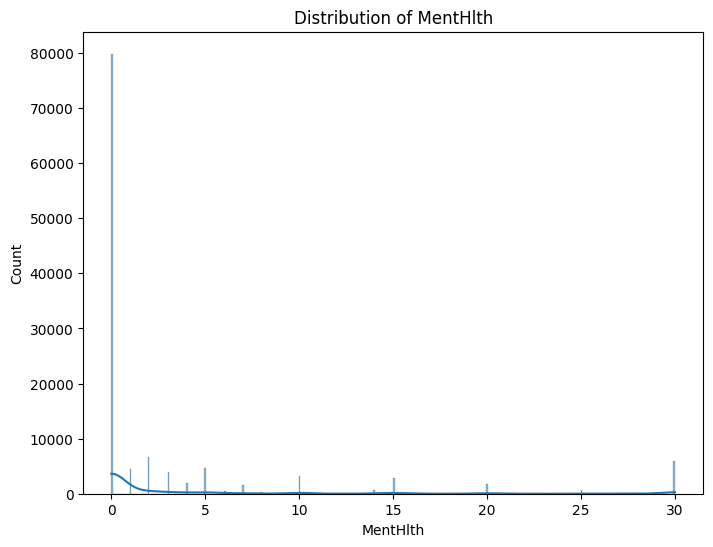

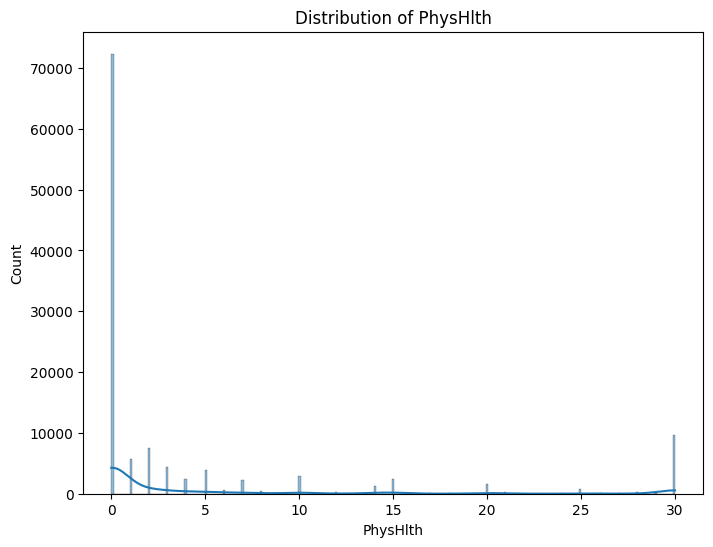

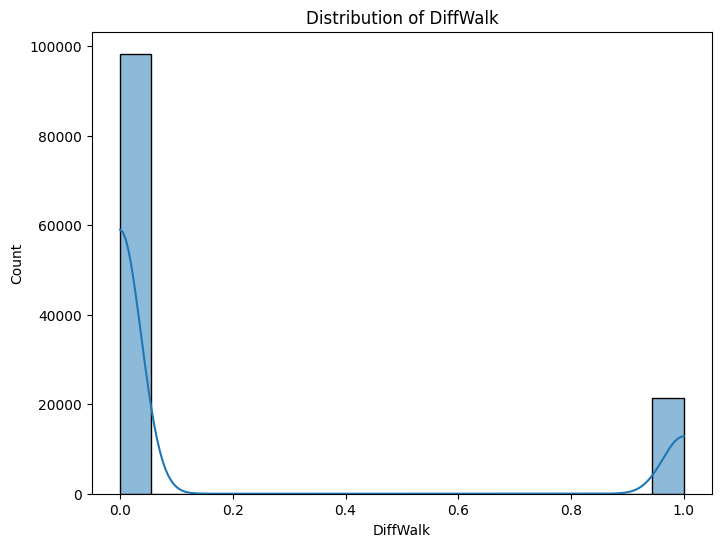

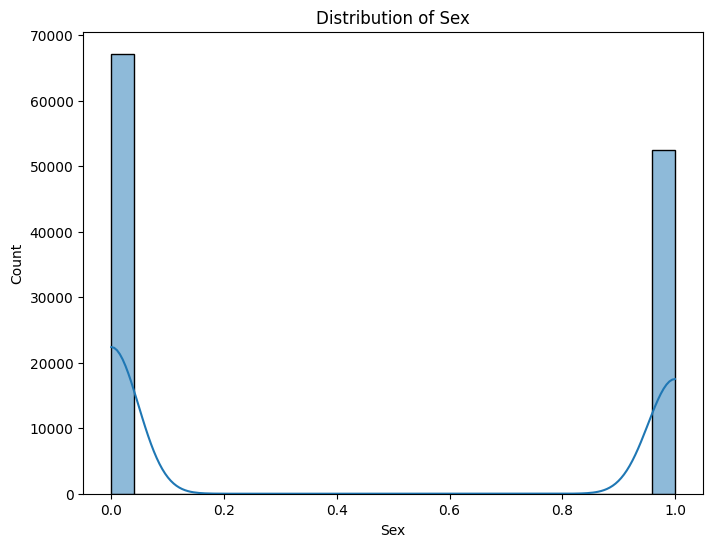

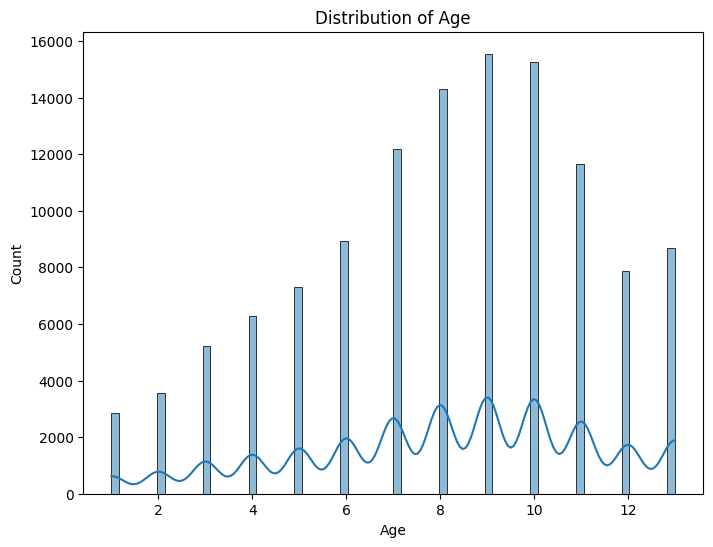

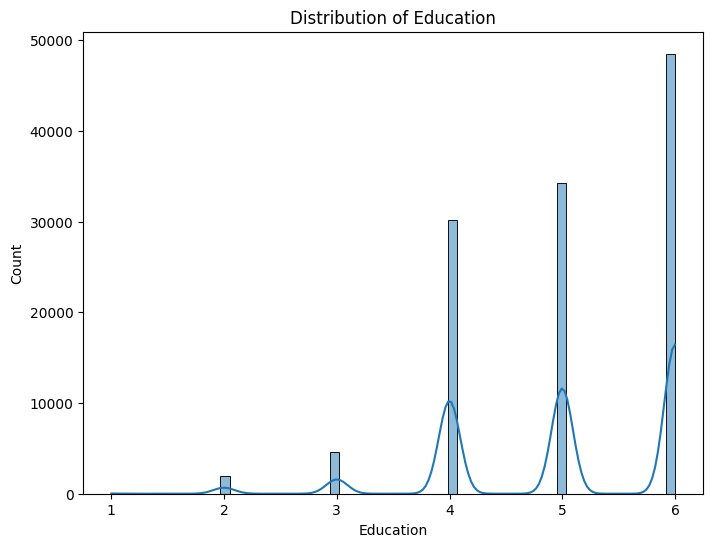

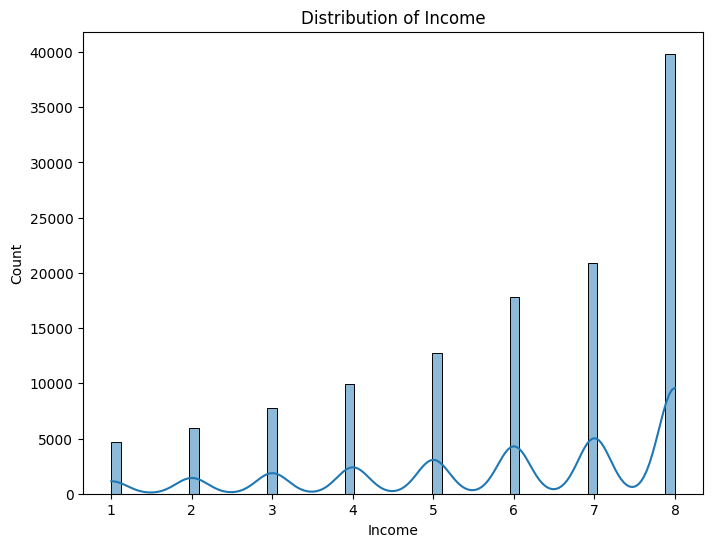

In [19]:
for col in df.columns:
  plt.figure(figsize=(8, 6))
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.show()

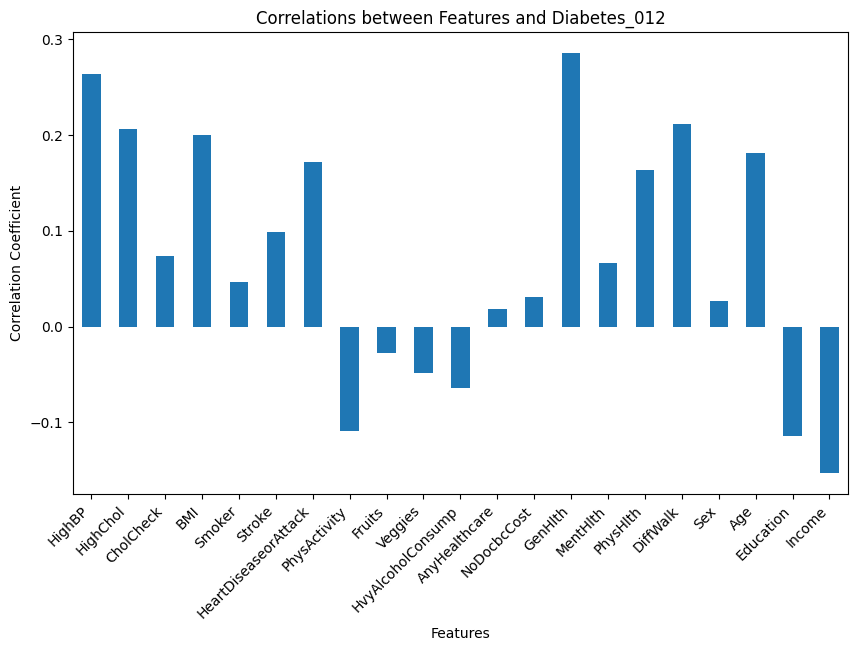

In [20]:
correlations = df.corr()['Diabetes_012'].drop('Diabetes_012')

plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlations between Features and Diabetes_012')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.show()

In [21]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 22/22 [00:02<00:00,  8.27it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [22]:
from imblearn.under_sampling import RandomUnderSampler
y.unique()


array([0., 1.])

In [23]:
rus = RandomUnderSampler(random_state=0)
X_under_sampled, y_undersampled = rus.fit_resample(x,y)



In [24]:
reasmpled_data=pd.concat([X_under_sampled,y_undersampled], axis=1)
reasmpled_data



HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
96002      0.0       1.0        1.0  24.0     0.0     0.0   
23486      1.0       1.0        1.0  43.0     0.0     0.0   
35906      0.0       0.0        1.0  22.0     0.0     0.0   
71192      1.0       1.0        1.0  35.0     0.0     0.0   
81505      0.0       1.0        1.0  30.0     0.0     0.0   
...        ...       ...        ...   ...     ...     ...   
128627     1.0       1.0        1.0  40.0     1.0     0.0   
128642     0.0       0.0        1.0  27.0     0.0     0.0   
128659     1.0       0.0        1.0  27.0     1.0     0.0   
128660     1.0       1.0        1.0   NaN     1.0     0.0   
128666     1.0       1.0        1.0  32.0     1.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
96002                    0.0           1.0     1.0      1.0  ...          0.0   
23486                    0.0           1.0     0.0      1.0  ...          0.0   
35906                    0.0           1.0     1.0      1.0  ...          NaN   
71192                    0.0           0.0     1.0      1.0  ...          0.0   
81505                    0.0           1.0     1.0      1.0  ...          0.0   
...                      ...           ...     ...      ...  ...          ...   
128627                   NaN           1.0     0.0      1.0  ...          0.0   
128642                   0.0           1.0     1.0      1.0  ...          0.0   
128659                   0.0           0.0     0.0      NaN  ...          0.0   
128660                   0.0           1.0     0.0      1.0  ...          NaN   
128666                   NaN           1.0     0.0      1.0  ...          NaN   

        GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  Income  \
96002       3.0       0.0       0.0       0.0  0.0  11.0        6.0     8.0   
23486       4.0       NaN       NaN       0.0  0.0   6.0        4.0     4.0   
35906       2.0       0.0       0.0       0.0  0.0   1.0        5.0     2.0   
71192       1.0       0.0       0.0       0.0  1.0  10.0        4.0     4.0   
81505       2.0       0.0       0.0       0.0  0.0   7.0        5.0     7.0   
...         ...       ...       ...       ...  ...   ...        ...     ...   
128627      3.0       0.0       0.0       0.0  1.0  12.0        5.0     6.0   
128642      2.0       0.0       0.0       0.0  0.0  13.0        5.0     4.0   
128659      4.0       0.0       0.0       0.0  1.0   8.0        3.0     1.0   
128660      2.0       0.0       0.0       0.0  0.0   6.0        4.0     5.0   
128666      3.0       0.0       2.0       0.0  0.0  11.0        5.0     4.0   

        Diabetes_012  
96002            0.0  
23486            0.0  
35906            0.0  
71192            0.0  
81505            0.0  
...              ...  
128627           1.0  
128642           1.0  
128659           1.0  
128660           1.0  
128666           1.0  

[40454 rows x 22 columns]

In [25]:
reasmpled_data['Diabetes_012'].unique()

array([0., 1.])

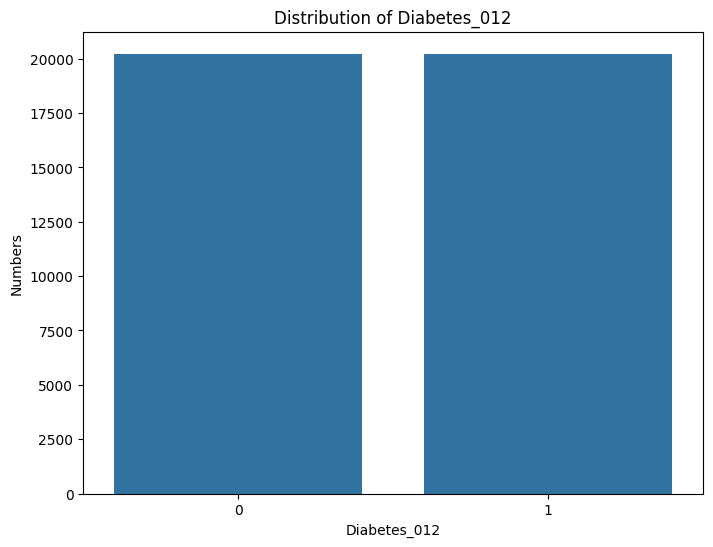

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Diabetes_012', data=reasmpled_data)
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Diabetes_012')
plt.ylabel('Numbers')
plt.title('Distribution of Diabetes_012')
plt.show()

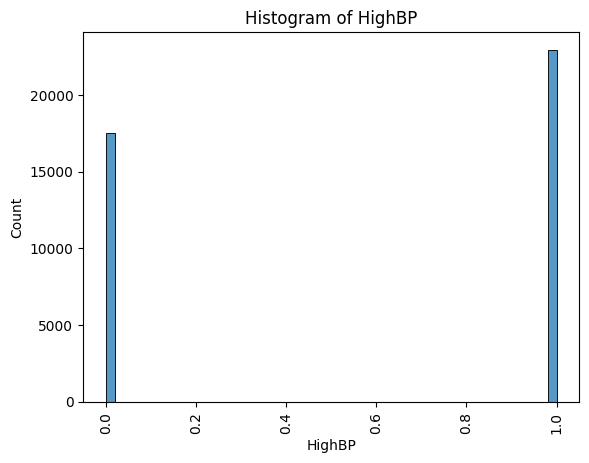

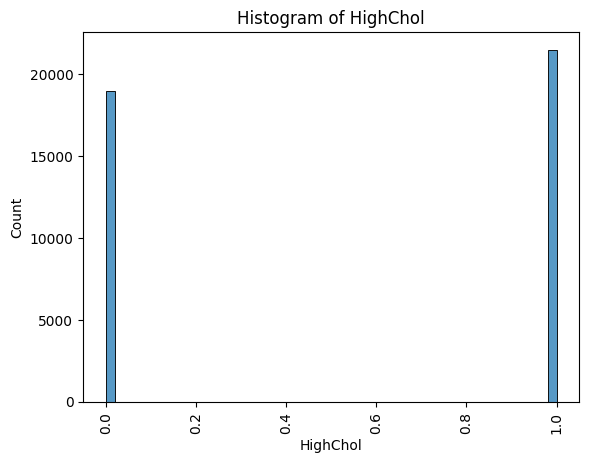

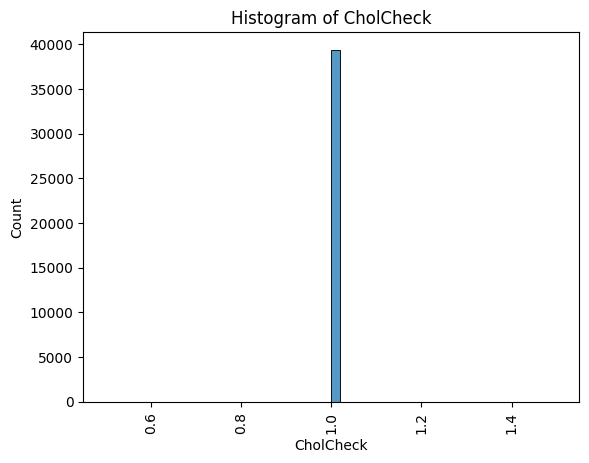

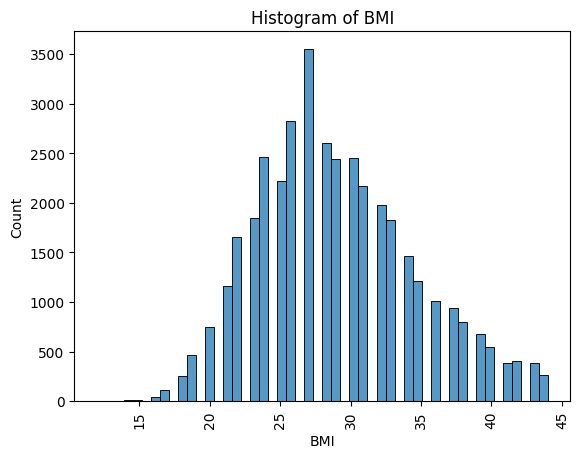

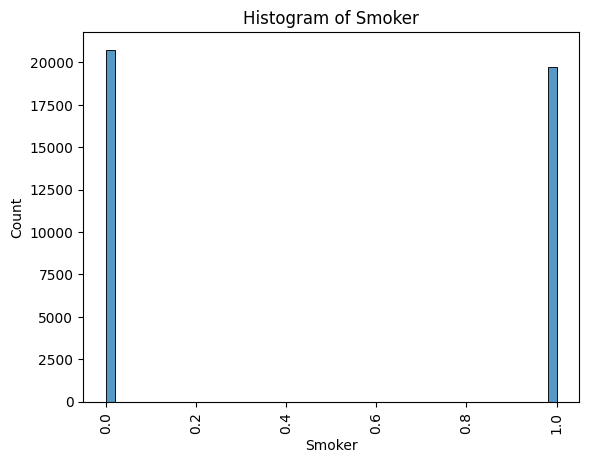

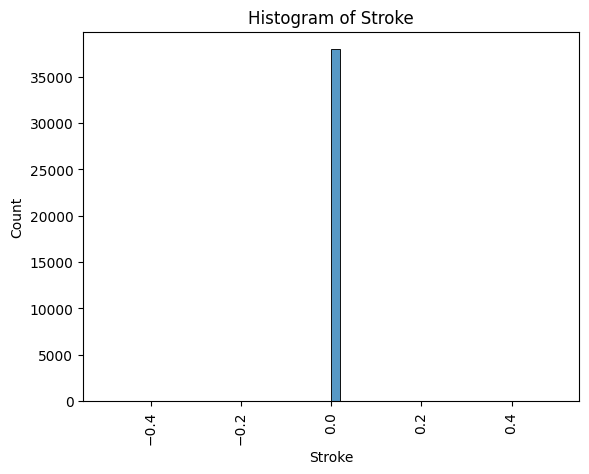

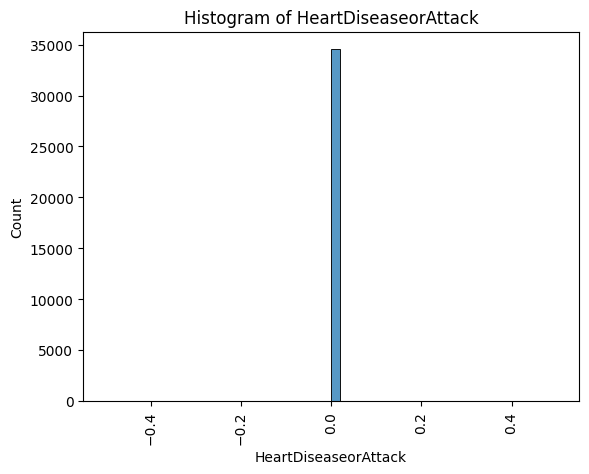

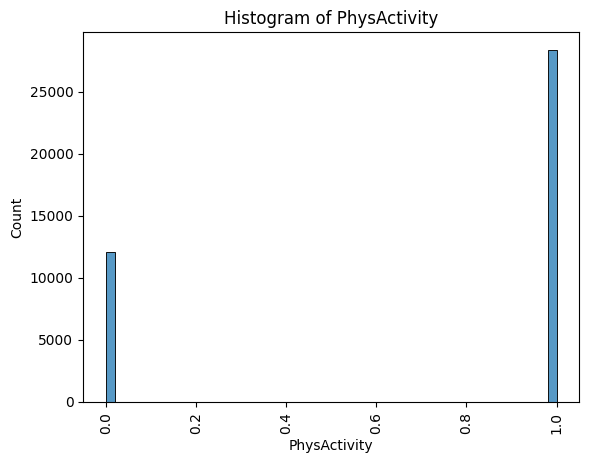

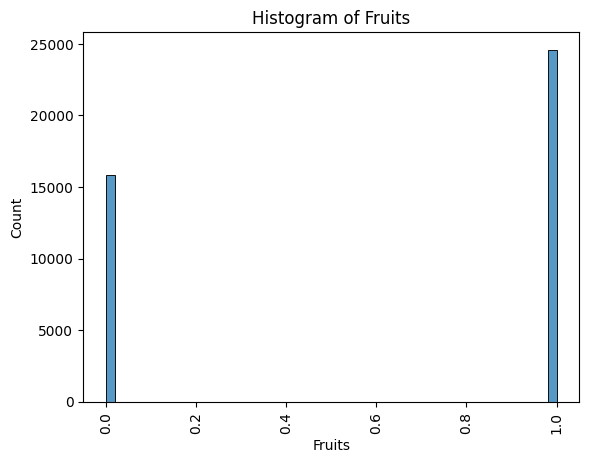

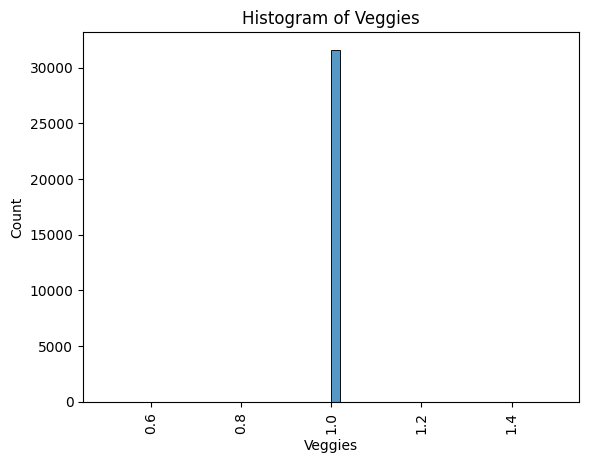

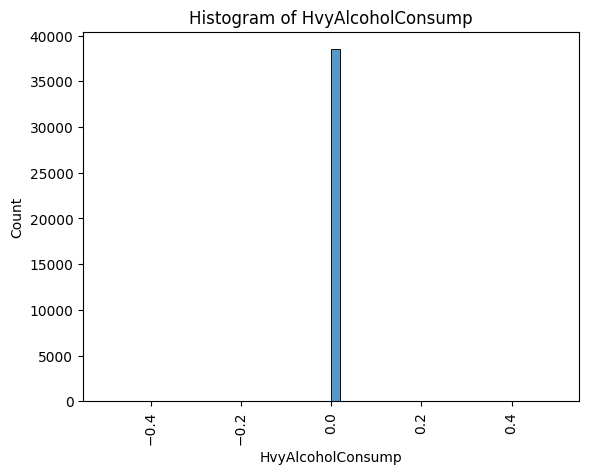

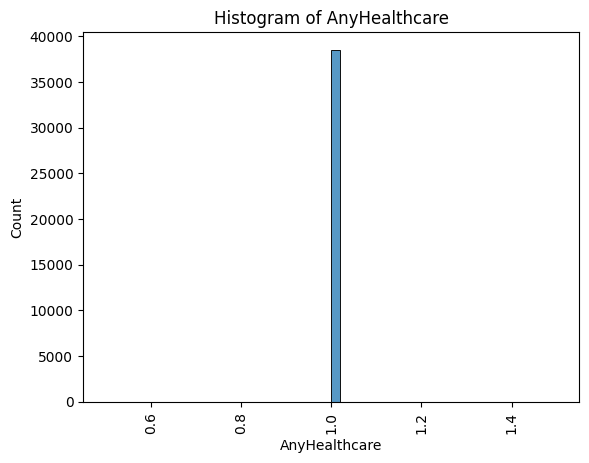

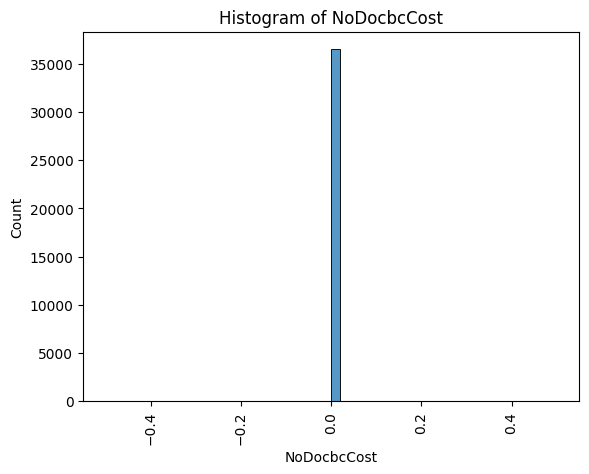

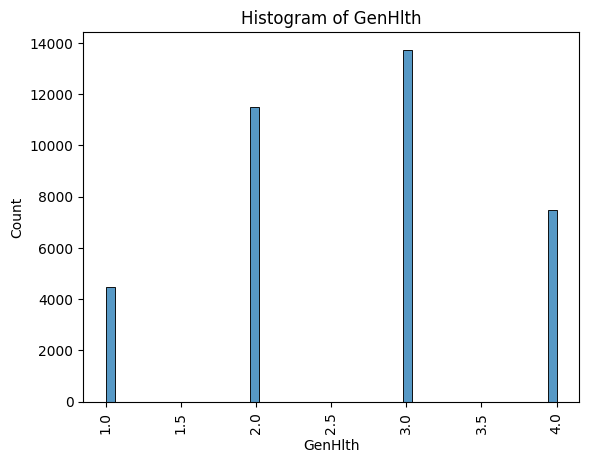

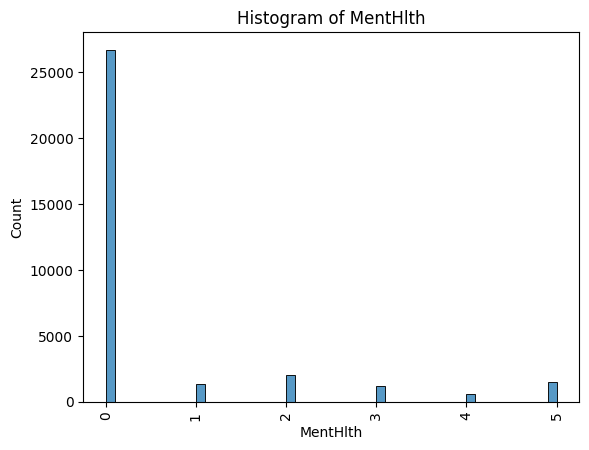

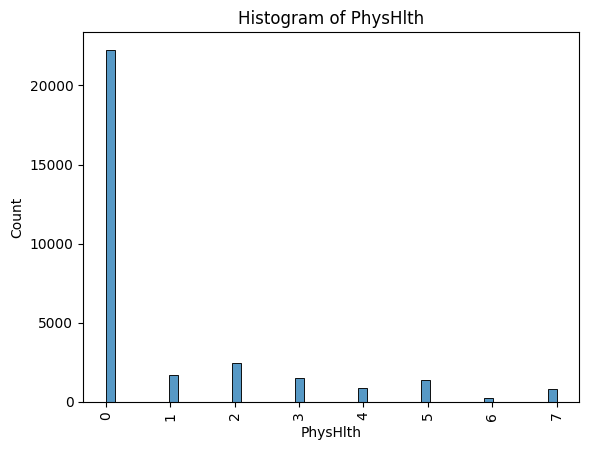

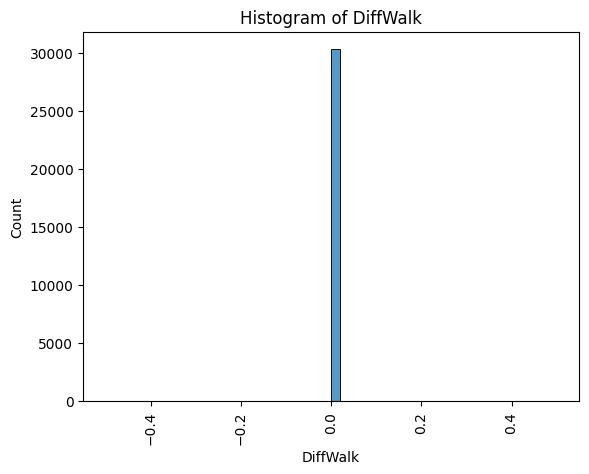

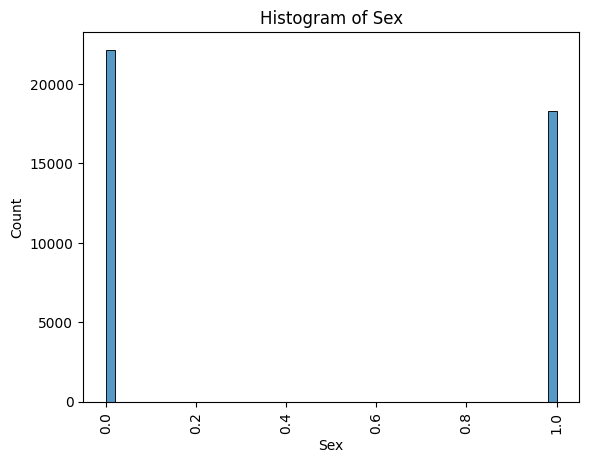

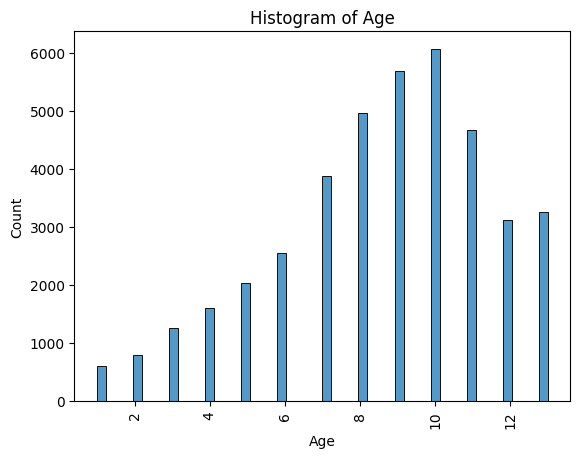

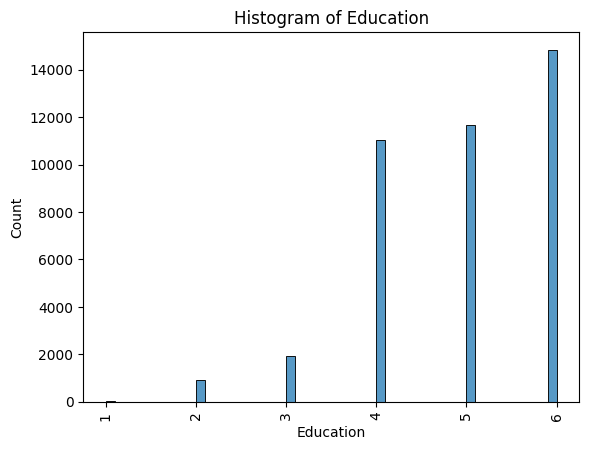

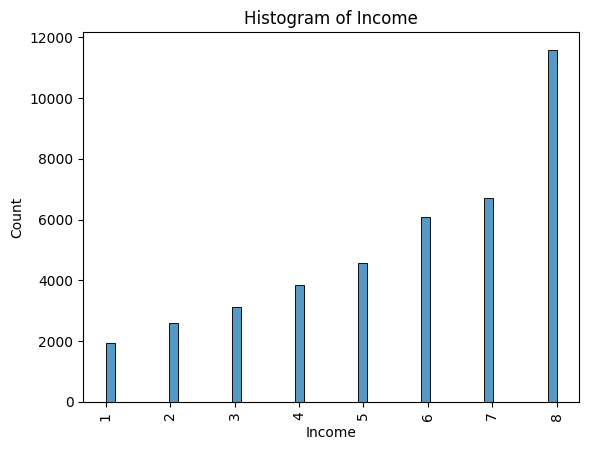

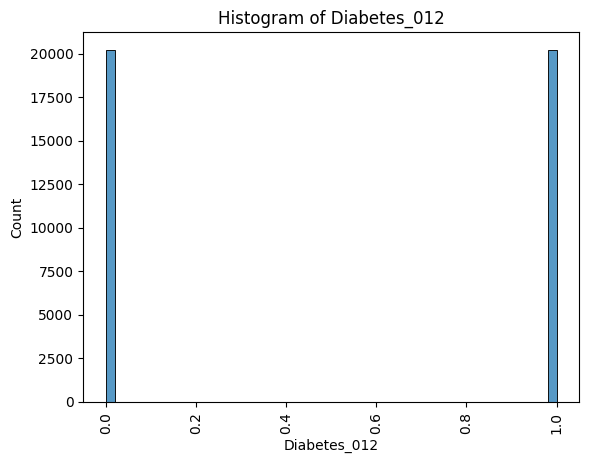

In [27]:
for col in reasmpled_data.columns:
    sns.histplot(reasmpled_data[col], bins=50, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.show()

#Features Selection

In [28]:
from sklearn.feature_selection import mutual_info_regression, VarianceThreshold, chi2, f_classif
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [29]:
feature_names = x.columns
# Standardize the features (required for some techniques)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

* Information Gain (Mutual Information)


In [30]:

from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_regression

# Assuming 'x' is your DataFrame
# Impute NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')  # Or choose another strategy
x_imputed = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)

# Now use the imputed data for mutual_info_regression
mi_scores = mutual_info_regression(x_imputed, y)
mi_scores = pd.Series(mi_scores, index=feature_names)
mi_scores.sort_values(ascending=False, inplace=True)


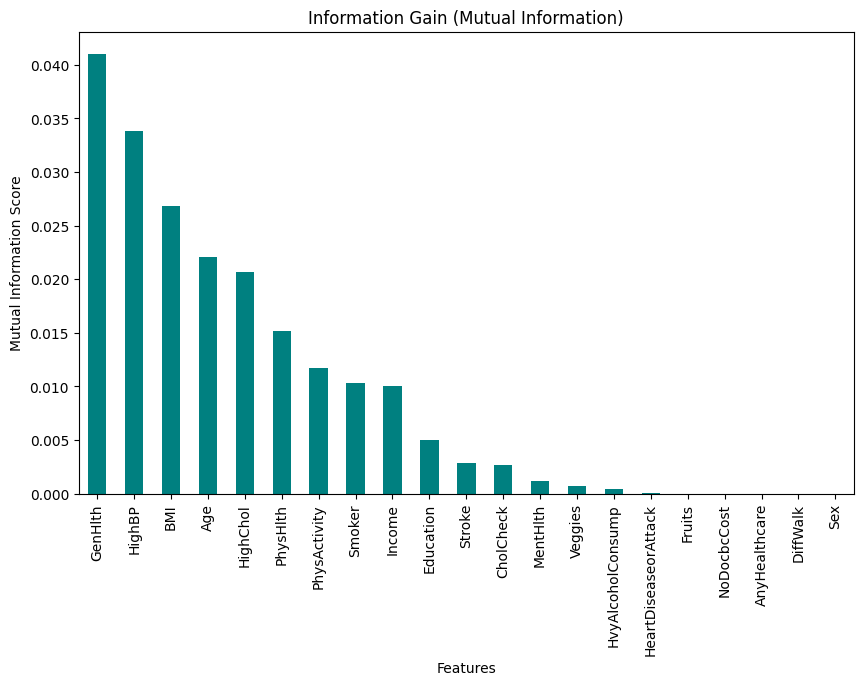

In [31]:
# Plot Information Gain
plt.figure(figsize=(10, 6))
mi_scores.plot(kind="bar", color="teal")
plt.title("Information Gain (Mutual Information)")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.show()

The output represents the Mutual Information for each feature in a dataset with two features.


Higher Mutual Information values suggest a stronger relationship or dependency between the features and the target variable.

* Chi-square Test (For Classification Only)

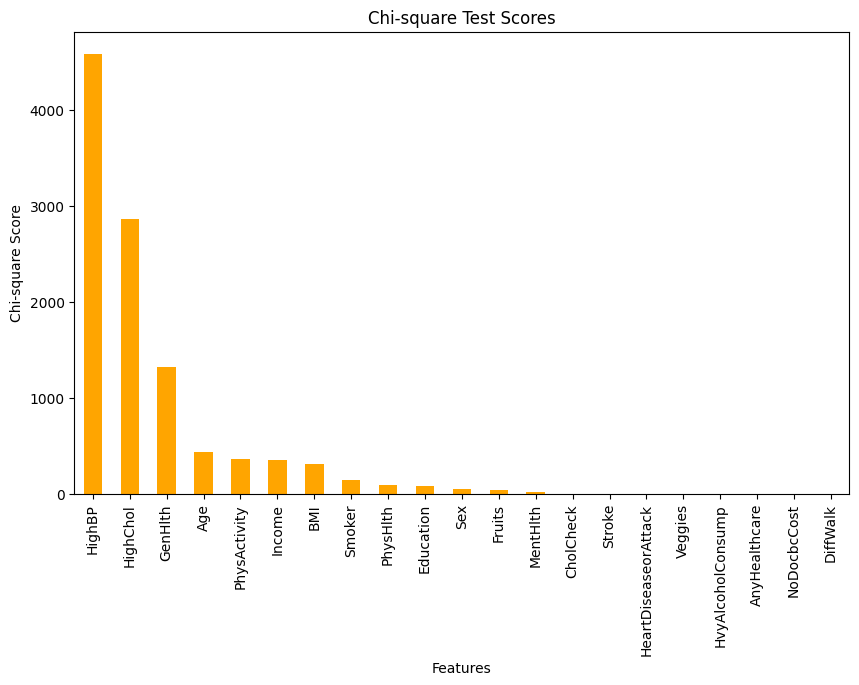

In [32]:
# Scale features to a non-negative range using MinMaxScaler
minmax_scaler = MinMaxScaler()
X_non_negative = minmax_scaler.fit_transform(x)

# Binarize the target variable for classification
y_bin = np.where(y > np.median(y), 1, 0)  # Convert to binary classification

X_non_negative = imputer.fit_transform(X_non_negative)


# Compute Chi-square scores
chi2_scores, _ = chi2(X_non_negative, y_bin)
chi2_scores = pd.Series(chi2_scores, index=feature_names)
chi2_scores.sort_values(ascending=False, inplace=True)

# Plot Chi-square Scores
plt.figure(figsize=(10, 6))
chi2_scores.plot(kind="bar", color="orange")
plt.title("Chi-square Test Scores")
plt.xlabel("Features")
plt.ylabel("Chi-square Score")
plt.show()

MedInc has a very high Chi-square score, meaning it has the strongest relationship with the target variable.

* Fisher’s Score (For Classification Only)


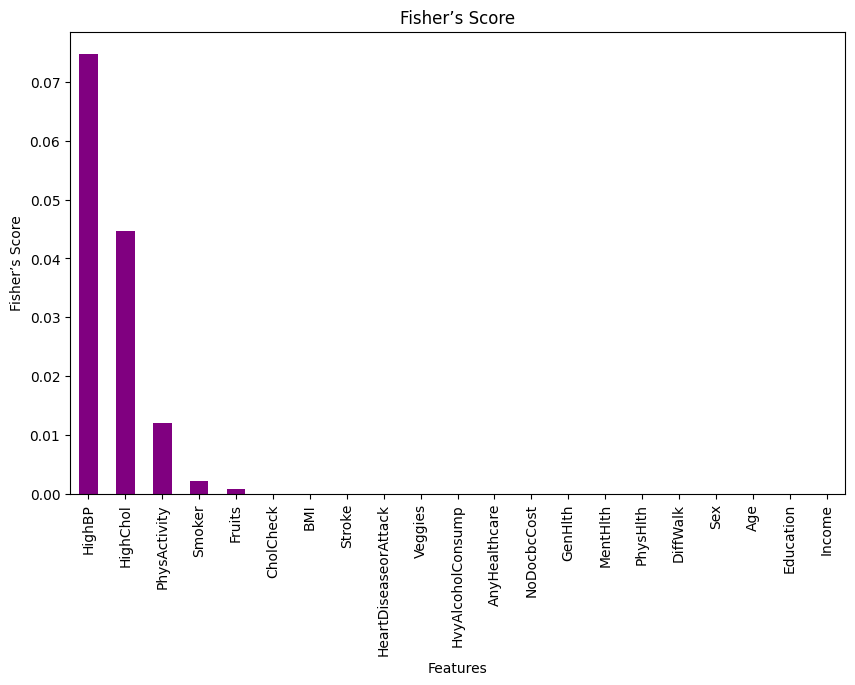

In [33]:
# Fisher’s Score is not directly available in scikit-learn, so we'll implement it manually.
def fisher_score(x, y):
    classes = np.unique(y)
    overall_mean = np.mean(x, axis=0)
    between_var = np.zeros(x.shape[1])
    within_var = np.zeros(x.shape[1])

    for c in classes:
        X_c = x[y == c]
        mean_c = np.mean(X_c, axis=0)
        n_c = X_c.shape[0]

        between_var += n_c * (mean_c - overall_mean) ** 2
        within_var += np.sum((X_c - mean_c) ** 2, axis=0)

    fisher_scores = between_var / within_var
    return fisher_scores

fisher_scores = fisher_score(X_scaled, y_bin)  # Using binarized target
fisher_scores = pd.Series(fisher_scores, index=feature_names)
fisher_scores.sort_values(ascending=False, inplace=True)

# Plot Fisher’s Scores
plt.figure(figsize=(10, 6))
fisher_scores.plot(kind="bar", color="purple")
plt.title("Fisher’s Score")
plt.xlabel("Features")
plt.ylabel("Fisher’s Score")
plt.show()

* Correlation Coefficient

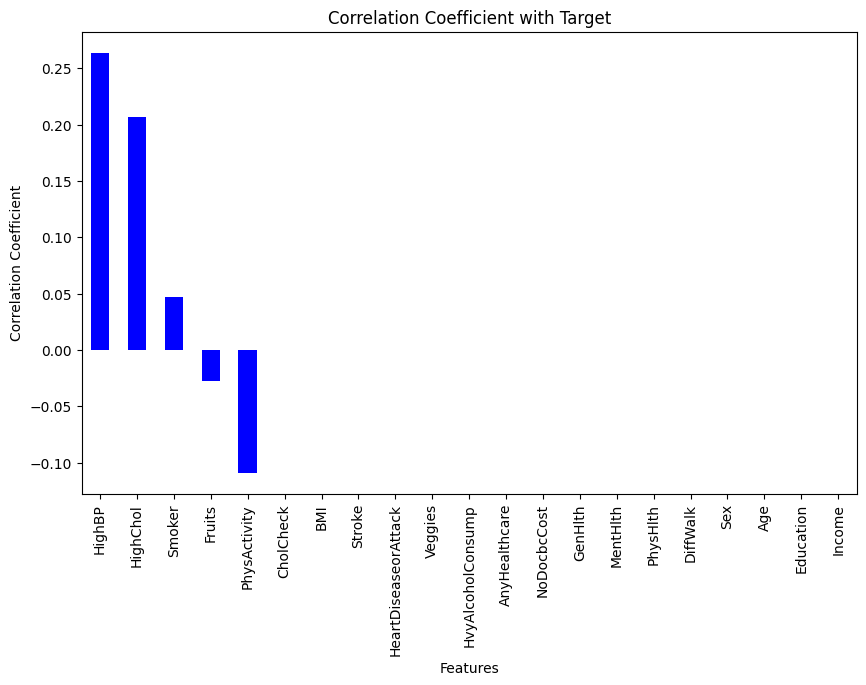

In [34]:
# Correlation Coefficient
corr_scores = np.corrcoef(x.T, y)[-1, :-1]  # Correlation with target
corr_scores = pd.Series(corr_scores, index=feature_names)
corr_scores.sort_values(ascending=False, inplace=True)

# Plot Correlation Coefficients
plt.figure(figsize=(10, 6))
corr_scores.plot(kind="bar", color="blue")
plt.title("Correlation Coefficient with Target")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()

* Variance Threshold


In [35]:
# Variance Threshold
variance_threshold = VarianceThreshold(threshold=0.1)  # Remove low-variance features
X_variance_selected = variance_threshold.fit_transform(x)

# Get selected features
selected_features = variance_threshold.get_support(indices=True)
print("Selected Features (Variance Threshold):", [feature_names[i] for i in selected_features])

Selected Features (Variance Threshold): ['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits', 'GenHlth', 'MentHlth', 'PhysHlth', 'Sex', 'Age', 'Education', 'Income']


* ANOVA (F-test)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 2  5  6  9 10 11 12 16] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


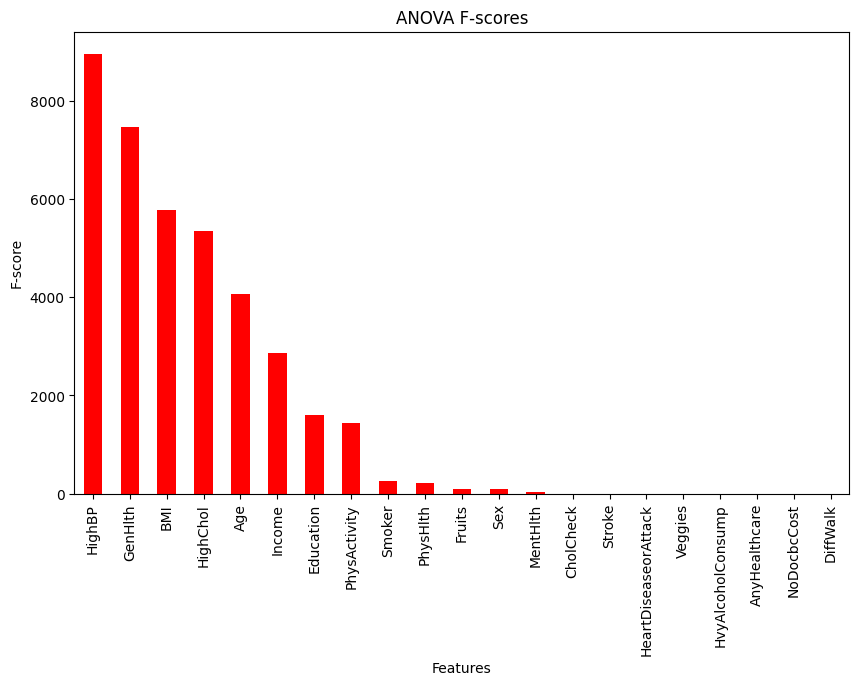

In [36]:
# ANOVA (F-test)
f_scores, _ = f_classif(x_imputed, y)  # ANOVA F-test
f_scores = pd.Series(f_scores, index=feature_names)
f_scores.sort_values(ascending=False, inplace=True)

# Plot ANOVA F-scores
plt.figure(figsize=(10, 6))
f_scores.plot(kind="bar", color="red")
plt.title("ANOVA F-scores")
plt.xlabel("Features")
plt.ylabel("F-score")
plt.show()

In [37]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression(max_iter=1000)
selector = RFE(estimator, n_features_to_select=10)
selector = selector.fit(x_imputed, y)



In [38]:
selected_features = x.columns[selector.support_]
print("Top Features Selected by RFE:")
print(selected_features)


Top Features Selected by RFE:
Index(['HighBP', 'HighChol', 'CholCheck', 'PhysActivity', 'Veggies',
       'AnyHealthcare', 'GenHlth', 'Sex', 'Age', 'Income'],
      dtype='object')


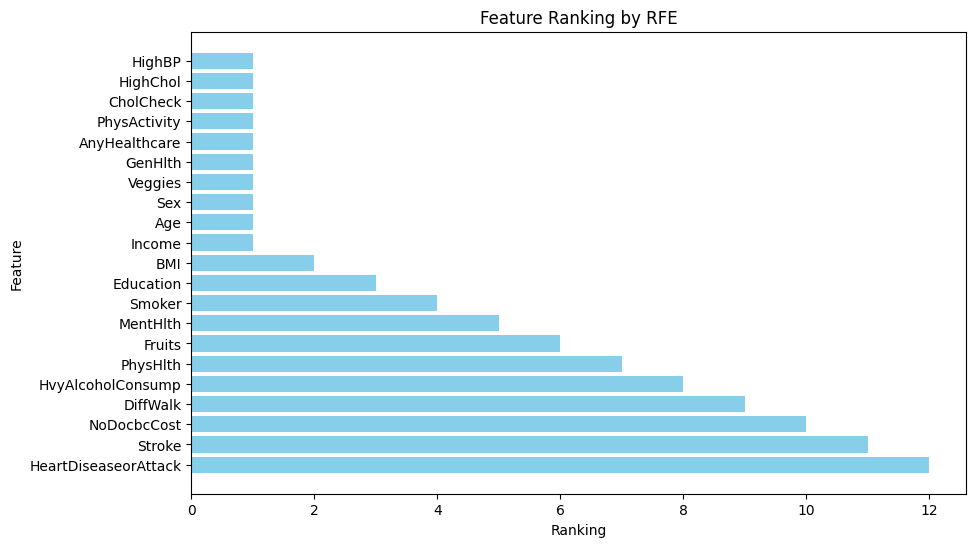

In [39]:
# Get the ranking of features from RFE
feature_ranking = selector.ranking_
feature_names = x.columns

# Create a DataFrame for better visualization
ranking_df = pd.DataFrame({'Feature': feature_names, 'Ranking': feature_ranking})

# Sort the DataFrame by ranking
ranking_df = ranking_df.sort_values('Ranking')

# Plot the feature rankings
plt.figure(figsize=(10, 6))
plt.barh(ranking_df['Feature'], ranking_df['Ranking'], color='skyblue')
plt.xlabel("Ranking")
plt.ylabel("Feature")
plt.title("Feature Ranking by RFE")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


# **KNN**

In [40]:
target_column = 'Diabetes_012'

In [41]:
X = df.drop(target_column, axis=1)
y = df[target_column]

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [44]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier

# Create an imputer to fill NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform both training and testing data
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
# Now you can use the imputed data for prediction
y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)

In [45]:
# Evaluate
from sklearn.metrics import accuracy_score, precision_score
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)

print("\n--- SVM ---")
print(f"Training Accuracy: {train_accuracy:.3f}")
print(f"Training Precision: {train_precision:.3f}")
print(f"Testing Accuracy: {test_accuracy:.3f}")
print(f"Testing Precision: {test_precision:.3f}")


--- SVM ---
Training Accuracy: 0.866
Training Precision: 0.684
Testing Accuracy: 0.816
Testing Precision: 0.418


Learning Curve

LIME

In [46]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=4321efc6c0b19a4f0627d3a6ba32ac22c25a1617d6dfd7102ec6e288c79cd65c
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [47]:

import lime
import lime.lime_tabular


# Create a LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled,
    feature_names=X_train.columns,  # Feature names
    class_names=['0', '1'],  # Class names
    discretize_continuous=True
)

# Choose an instance from the test set to explain
instance_to_explain = X_test_scaled[0]

# Get the explanation
explanation = explainer.explain_instance(
    data_row=instance_to_explain,
    predict_fn=knn.predict_proba,
    num_features=10
)

# Show the explanation
explanation.show_in_notebook(show_table=True)



LOFO

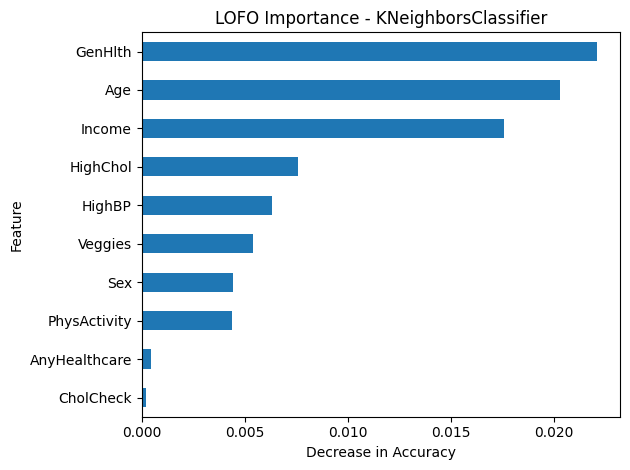

         Feature  Importance
6        GenHlth    0.022096
8            Age    0.020294
9         Income    0.017584
1       HighChol    0.007580
0         HighBP    0.006315
4        Veggies    0.005420
7            Sex    0.004417
3   PhysActivity    0.004405
5  AnyHealthcare    0.000454
2      CholCheck    0.000203


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import clone
from sklearn.metrics import accuracy_score

def lofo_importance(model, X, y):
    # Ensure we have a DataFrame for X to keep feature names
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X)

    feature_names = X.columns
    importance = []

    # Train the model on full feature set
    model_full = clone(model)
    model_full.fit(X, y)
    base_score = accuracy_score(y, model_full.predict(X))

    for feature in feature_names:
        X_temp = X.drop(columns=feature)
        model_clone = clone(model)
        model_clone.fit(X_temp, y)
        score = accuracy_score(y, model_clone.predict(X_temp))
        importance.append((feature, base_score - score))

    # Create a sorted DataFrame
    lofo_df = pd.DataFrame(importance, columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

    # Plot
    lofo_df.plot(x='Feature', y='Importance', kind='barh', legend=False)
    plt.gca().invert_yaxis()  # Highest importance at the top
    plt.title("LOFO Importance - {}".format(type(model).__name__))
    plt.xlabel("Decrease in Accuracy")
    plt.tight_layout()
    plt.show()

    return lofo_df

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
# Select only the columns corresponding to selected_features in X_train_scaled
X_train_scaled_selected = pd.DataFrame(X_train_scaled, columns=X_train.columns)[selected_features]
lofo_results = lofo_importance(knn, X_train_scaled_selected, y_train)
print(lofo_results)

Feature Importance

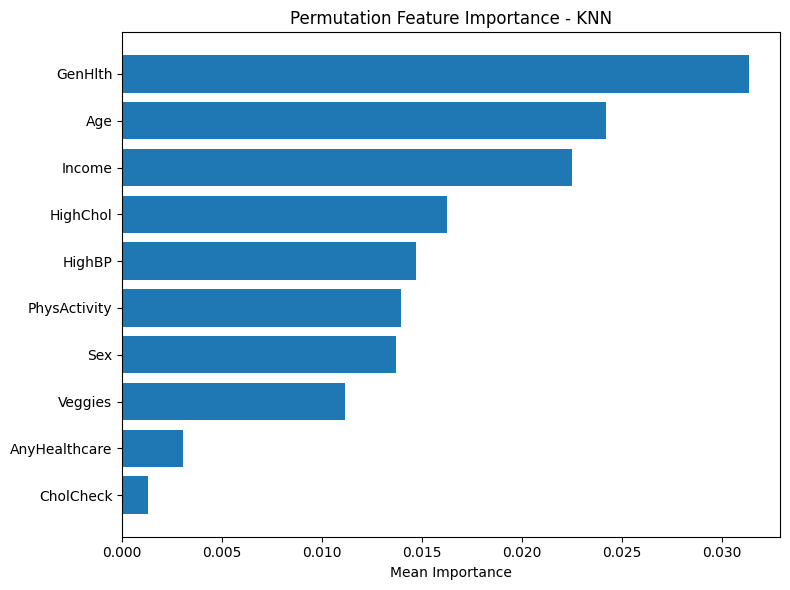

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier

# Fit the model
knn.fit(X_train_scaled_selected, y_train)

# Compute permutation importances
result = permutation_importance(
    knn,
    X_train_scaled_selected,
    y_train,
    n_repeats=3,  # keep low to reduce time
    random_state=42,
    n_jobs=2
)

# Sort importances
sorted_idx = result.importances_mean.argsort()

# Plot horizontal bar chart
plt.figure(figsize=(8, 6))
plt.barh(X_train_scaled_selected.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.title("Permutation Feature Importance - KNN")
plt.xlabel("Mean Importance")
plt.tight_layout()
plt.show()


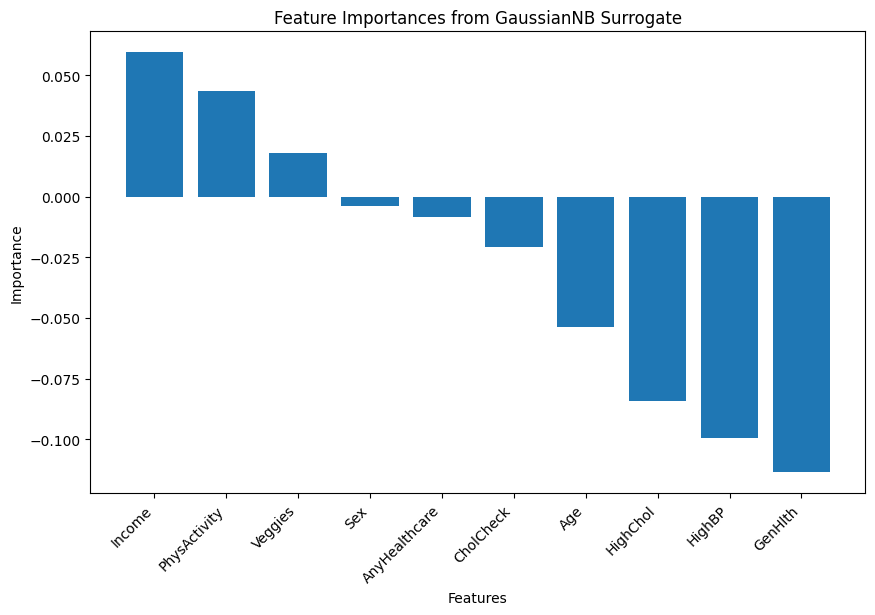

In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score

# Use blackbox model predictions as targets
surrogate = GaussianNB(var_smoothing=1e-1)
# Predict using the same features used during training (X_train_scaled_selected)
rf_preds = knn.predict(X_train_scaled_selected)  # Changed line
surrogate.fit(X_train_scaled_selected, rf_preds) # Changed line


feature_importances = surrogate.theta_
# Create a DataFrame for visualization, ensuring both arrays have the same length
feature_importance_df = pd.DataFrame({
    'Feature': X_train_scaled_selected.columns,  # Use columns from X_train_scaled_selected # Changed line
    'Importance': feature_importances[0][:len(X_train_scaled_selected.columns)]  # Slice feature_importances to match # Changed line
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from GaussianNB Surrogate')
plt.show()